

<font size="+3"><span style='color:#178578'> **P3 - Concevez une application au service de la santé publique** </span></font>


![SanteFr](img/SanteFr.png)
![OpenFoodFacts](img/openFoodFct.png)



Ce Notebook s'intègre dans le projet de conception d'une application pour la santé publique utilisant les données disponibles dans le jeux de données [OpenFoodFacts](https://world.openfoodfacts.org/). <br>

Il comprend la présentation et la justification de l'application [**Chef Cloud**](#presentation_application), ainsi que le nettoyage des données. <br>

Le jeu de données uilisé correspond à la sauvegarde du jeu de données nettoyé lors de la première phase de nettoyage.


# <font size="+1">**Table de matières**</font>

[Librairies utilisées](#CHARGEMENT_LIBRAIRIES)<br>

[Fontcions utilisées dans ce notebook](#FONCTIONS_UTILISÉES)<br>

---

[**Objectif de la phase d'exploration**](#objectif)<br>

---

[**Chargement du jeu de données**](#charg_données)<br>

[**Description du jeux de données**](#descrip_données)<br>

---

[**Analyses univariées**](#analyses_univariées)<br>
 * [Variables qualitatives](#vari_quali)
 * [Variables quantitatives](#vari_quanti)
<br>

[**Analyses multivariées**](#analyses_multivariées)<br>
 * [Relation entre variables qualitatives](#bivariee_quali_quali)
 * [Relation entre variables quantitatives](#bivariee_quanti_quanti)
 * [Relation entre variables qualitatives et quantitatives](#bivariee_quanti_quali)<br>
<br>

[**Analyse en composantes pincipales, ACP**](#PCA1)<br> 
 * [Préparation des données pour la ACP](#prepa_donnees_PCA)
 * [PCA](#PCA)
 * [Projection](#projectionPCA)<br>
<br> 

[**Cluster**](#clusters)<br> 
 * [Préparation des données](#data_prep_cluster)
 * [Clustering](#clustering)
 * [Projection](#projectionPCA)<br>
<br> 

[**Régime cétogène, retation entre la teneur en glucides et le nutri-score**](#regimeCeto_gluci_nutriScore)<br> 
 * [ANOVA](#test_ANOVA)
 * [Évaluation correlation Glucides et Nutri-Score](#eta_squared_categ_variNutri)<br>
<br> 

---

[**Conclusions de l'analyse exploratoire**](#conclusion_explo)<br> 
<br>


<a id='CHARGEMENT_LIBRAIRIES'></a>

---
---

<font size="+1"> **CHARGEMENT DES LIBRAIRIES** </font>

---




In [1]:
#import sys

#!pip install wordcloud
#!pip install pingouin

import pandas as pd
import numpy as np
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

#import plotly as plotly
#import plotly.express as px

import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
#from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
#from sklearn.metrics import confusion_matrix

from wordcloud import WordCloud
#from PIL import Image

import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

import pingouin as pg


'''
#-----------------------------
#Actuallisation des packages
#-----------------------------
'''
#!pip install --upgrade pip


'''
#-------------------------------------------------------------
#Vérification des numéros des versions des packages installés
#-------------------------------------------------------------
'''
print('Version des librairies utilisées : \n')

#print('Python        : ' + sys.version)
print('Pandas        : ' + pd.__version__)
print('NumPy         : ' + np.version.full_version)
print('Csv           : ' + csv.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)
#print('Plotly        : ' + plotly.__version__)
print('Sklearn        : ' + sklearn.__version__)
print('Pingouin        : ' + pg.__version__)



import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)


Version des librairies utilisées : 

Pandas        : 1.5.2
NumPy         : 1.24.1
Csv           : 1.0
Matplotlib    : 3.3.4
Seaborn       : 0.11.1
Sklearn        : 1.2.0
Pingouin        : 0.5.3
Lancé le      : 2023-01-15T14:30:37.964881



<a id='FONCTIONS_UTILISÉES'></a>


<br>


---
---

<font size="+1"> **FONCTIONS UTILISÉES DANS CE NOTEBOOK** </font>

---


* [Informations complémentaires pour la description des fichiers de données ](#compl_info)<br>

* [Informations complémentaires pour l'analyse des Statistiques descriptifs ](#stat_des)<br>

* [Description variables qualitatives nominales](#wordcloud_tableau_repartition)<br>

* [Test correlation entre variables qualitatives](#test_chi2)<br>

* [Création du graphique de correlation, PCA](#correlation_graph)<br>

* [Création du graphique de projection des individus sur le graphique de correlation, PCA](#display_factorial_planes)<br>


<a id='compl_info'></a>

In [2]:
#-----------------------------------------------------------------------------
# Informations complémentaires pour la description des fichiers de données 
#-----------------------------------------------------------------------------

def compl_info (df):
    nb_row = df.index.size
    nb_col = df.columns.size
    Types = pd.DataFrame(df.dtypes).T.rename(index={0:'Type'}) 
    Null = pd.DataFrame(df.isna().sum()).T.rename(index={0:'null'}) 
    PercCount = pd.DataFrame(100-100*(df.isna().sum())/nb_row).T.rename(index={0:'Percent count'}) 
    infor = pd.concat ([Types,Null,PercCount], axis =0)
    return infor

<a id='stat_des'></a>

In [3]:
#-----------------------------------------------------------------------------
# Informations complémentaires pour l'analyse des Statistiques descriptifs
#-----------------------------------------------------------------------------

def stat_des (df):
    Min = pd.DataFrame(df.min()).T.rename(index={0:'Min'})
    Max = pd.DataFrame(df.max()).T.rename(index={0:'Max'})
    Mean = pd.DataFrame(df.mean()).T.rename(index={0:'Mean'})
    Median = pd.DataFrame(df.median()).T.rename(index={0:'Median'})                
    Variance = pd.DataFrame(df.var(ddof=0)).T.rename(index={0:'Variance'})
    Standard_deviation = pd.DataFrame(df.std(ddof=0)).T.rename(index={0:'Standard_deviation'})
    Skewness = pd.DataFrame(df.skew()).T.rename(index={0:'Skewness'})
    Kurtosis = pd.DataFrame(df.kurtosis()).T.rename(index={0:'Kurtosis'})
    Mode = pd.DataFrame(vari_quanti_conti.mode().rename(index={0:'Mode'}))
    
    stat = pd.concat([Min, Max, Mean, Median, Variance, Standard_deviation, Skewness, Kurtosis, Mode], axis=0)
    return stat
                       

<a id='wordcloud_tableau_repartition'></a>

In [4]:
# ---------------------------------------------
#  DESCRIPTION VARIABLES QUALITATIVES NOMINALES
# ---------------------------------------------


def wordcloud_tableau_repartition(dataframe, variable, wordcloud=True, tableau =True, graphRepart=True):
   
    """
    Affiche les 'mots' les plus fréquents (wordcloud), le tableau des fréquences et un graphique de barres avec la frequence des mots
    Paramètres : dataframe : DataFrame, obligatoire
                 variable : variable à analyser, obligatoire
                 wordcloud : booléen, True = affiche le wordcloud 
                 tableau : booléen, True = affiche le tableau des fréquences
                 graphRepart : booléen,  True = affiche le graphique de répartition en pourcentage
    """

    if wordcloud:
        wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots).generate(' '.join(dataframe[variable]))
        plt.figure(figsize = (8, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

    if tableau:
        df = dataframe[variable].value_counts().to_frame().reset_index() 
        df = df.rename(columns={'index':variable, variable:'nombre_entrees'})
        df['frequence (%)'] = 100*df['nombre_entrees']/((dataframe.shape[0]))
        display(df.head(10).style.hide(axis="index"))
        
    if graphRepart:
        plt.figure(figsize=(6,8))
        df_graph = df.sort_values('frequence (%)', ascending=False).head(20)
        sns.barplot(data= df_graph, x= 'frequence (%)', y= variable , palette = "viridis_r")
        plt.title("Répartition de " + variable)
        plt.show()
        

<a id='test_chi2'></a>

In [5]:

#----------------------------------------------
# TEST CORRELATION ENTRE VARIABLES QUALITATIVES
#----------------------------------------------

def test_chi2(column1, column2):

    """
    Test correlation de 2 variables qualitatives
    Paramètres  :  column1 : variable qualitative 1, obligatoire
                   column2 : variable qualitative 2, obligatoire
    """ 
    
    # H0 : les variables sont indépendantes
    # H1 : les variables NE sont pas indépendantes
    
    Crosstab = pd.crosstab(column1, column2)
    alpha = 0.05
    
    stat_chi2, p_value, dof, expected_table = chi2_contingency(Crosstab.values)
    
    print('Le p_value du Test chi2 est : {}\n'.format(p_value))
    if p_value <= alpha:
        print('\033[1m'+ 'H0 rejetée.' + '\033[0m' + ' Variables non indépendantes. p_value = {} <= alpha = {}'.format(p_value, alpha))
    else:
        print('\033[1m' + 'H0 non rejetée.' + '\033[0m' + ' Variables indépendantes. p_value = {} >= alpha = {}'.format(p_value, alpha))       
        

<a id='correlation_graph'></a>

In [6]:

#---------------------------------------
# CRÉATION GRAPHIQUE DE CORRELATION, PCA 
#---------------------------------------

# Bloc de code extrait du cours OC "Réalisez une analyse exploratoire de données"


def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y
    
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('PC{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('PC{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (PC{} et PC{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale


    plt.axis('equal')
    plt.show(block=False)


<a id='display_factorial_planes'></a>

In [7]:

#---------------------------------------------------------------------------------------
# CRÉATION DU GRAPHIQUE DE PROJECTION DES INDIVIDUS SUR LE GRAPHIQUE DE CORRELATION, PCA 
#---------------------------------------------------------------------------------------

# Bloc de code extrait du cours OC "Réalisez une analyse exploratoire de données"


def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c, palette =color)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'PC{x+1} {v1}')
    ax.set_ylabel(f'PC{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur PC{x+1} et PC{y+1})")
    plt.show()



<a id='objectif'></a>
<br>


---
---

# <span style='background:#178578'><span style='color:white'>**Objectif de la phase d'exploration** </span></span>


Nous souhaitons développer unne application pour vous aider à trouver la recette qui convient aux aliments que vous avez a à la maison et à votre humeur diététique : **Chef Cloud** <a id='presentation_application'></a>.<br>

Notre **objectif** ici est de déterminer la faisabilité de l'application et l'adaptation du jeu de données à celle-ci.

Dans un premier temps, le jeu de données est décrit.

Ensuite nous avons procédé à l'[**analyse univariée** des **variables** ](#analyses_univariées) disponibles. Cela permettra de comprendre comment les données sont réparties dans chacune d'entre elles et, le cas échéant, d'identifier les biais d'information qui pourraient avoir un impact sur la faisabilité de l'application.

De nombreuses **analyses multivariées** ont été réalisées pour confirmer ou infirmer la possibilité de générer des recettes avec des nutriscore différents à partir des mêmes produits.
Nous avons vérifié l'**indépendance** d'une sélection de [**variables qualitatives**](#bivariee_quali_quali) : nutriscore et marques consommées, nutriscore et catégorie de produits, nutriscore et sous-catégorie de produits.
Nous avons vérifié le degré de [**corrélation entre les variables nutritionnelles quantitatives**](#bivariee_quanti_quanti). 
Nous avons également analysé la [**répartition des variables nutritionnelles en fonction de la catégorie de produits et du nutri-score**](#bivariee_quanti_quali). 

La corrélation multidimensionnelle entre les variables quantitatives sera explorée au moyen d'une [**analyse en composantes principales**](#PCA).

La relation entre les catégories d'aliments ('pnns_groups_') et leurs caractéristiques nutritionnelles, a été explorée au moyen d'un analyse [**cluster**](#clusters).

L'un des sous-objectifs du **Chef Cloud** est d'aider les personnes qui souhaitent contrôler leur poids. 
Il existent actuellement des régimes pour perdre du poids qui proposent des restrictions en certains des composants nutritionnels.
Par exemple, le **régime cétogène** propose une réduction drastique de l'apport en glucides. 
Pour mieux comprendre si la restriction de l'apport en glucides associée au régime cétogène implique une amélioration de la **qualité nutritionnelle** des aliments consommés, nous effectuerons une analyse de corrélation entre la teneur en glucides et la catégorie de nutri-score des aliments.




<a id='charg_données'></a>
<br>


---
---

# <span style='background:#178578'><span style='color:white'>**Chargement du jeu de données** </span></span>


In [8]:

df_openfoodfacts_cleaned = pd.read_csv('openfoodfacts_cleaned.csv', sep='\t', low_memory=False, encoding='utf-8')


In [9]:

# Aperçu du jeu de données
df_openfoodfacts_cleaned.head(3)


,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,alcohol_100g,nutrition-score-fr_100g
0,pack de 2 twix,"twix, lundberg",non renseigné,unknown,unknown,1481.0,4.17,6.47,48.67,77.08,6.2,6.25,73.27,28.85,0.0,0.0,0.0
1,"pepsi, nouveau goût !",pepsi,e,beverages,sweetened beverages,177.0,0.00,0.00,10.40,10.40,0.0,0.00,0.03,0.01,0.0,0.0,13.0
2,tarte poireaux et lardons,bo frost,d,non renseigné,non renseigné,1079.0,27.00,11.00,1.00,67.77,1.4,7.50,0.80,0.31,0.0,0.0,15.0



<a id='descrip_données'></a>
<br>


---
---

# <span style='background:#178578'><span style='color:white'>**Description du jeu de données** </span></span>


In [10]:

# Taille du jeu de données
df_openfoodfacts_cleaned.shape


(63030, 17)

In [11]:

#-----------------------------
# Colonnes ; types des données 
#-----------------------------
df_openfoodfacts_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63030 entries, 0 to 63029
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_name                 63030 non-null  object 
 1   brands                       63030 non-null  object 
 2   nutrition_grade_fr           63030 non-null  object 
 3   pnns_groups_1                63030 non-null  object 
 4   pnns_groups_2                63030 non-null  object 
 5   energy_100g                  63030 non-null  float64
 6   fat_100g                     63030 non-null  float64
 7   saturated-fat_100g           63030 non-null  float64
 8   sugars_100g                  63030 non-null  float64
 9   carbohydrates_100g           63030 non-null  float64
 10  fiber_100g                   63030 non-null  float64
 11  proteins_100g                63030 non-null  float64
 12  salt_100g                    63030 non-null  float64
 13  sodium_100g     

Certaines variables ne presentent pas le bon type de données

**Transformer les variables en catégoriques**

In [12]:

df_openfoodfacts_cleaned['pnns_groups_1'] = df_openfoodfacts_cleaned['pnns_groups_1'].astype("category")
df_openfoodfacts_cleaned['pnns_groups_2'] = df_openfoodfacts_cleaned['pnns_groups_2'].astype("category")
df_openfoodfacts_cleaned['nutrition_grade_fr'] = df_openfoodfacts_cleaned['nutrition_grade_fr'].astype("category")
df_openfoodfacts_cleaned['brands'] = df_openfoodfacts_cleaned['brands'].astype("category")


In [13]:

#--------------------------------------------------------
# Colonnes ; types des données et pourcentage remplissage
#--------------------------------------------------------
pd.options.display.max_rows = 25
info_openfoodfacts_cleaned = compl_info(df_openfoodfacts_cleaned).T
info_openfoodfacts_cleaned


,Type,null,Percent count
product_name,object,0,100.0
brands,category,0,100.0
nutrition_grade_fr,category,0,100.0
pnns_groups_1,category,0,100.0
pnns_groups_2,category,0,100.0
energy_100g,float64,0,100.0
fat_100g,float64,0,100.0
saturated-fat_100g,float64,0,100.0
sugars_100g,float64,0,100.0
carbohydrates_100g,float64,0,100.0


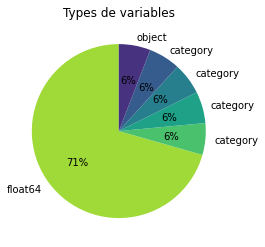

In [14]:

#Type de données

dTypes = info_openfoodfacts_cleaned['Type'].value_counts()
viridis_r6 = sns.color_palette(palette="viridis_r", n_colors =6)

plt.pie(dTypes.values.tolist(), labels=['float64', 'category','category','category','category', 'object'], colors = viridis_r6, autopct='%.0f%%', startangle=90)
plt.title("Types de variables")
plt.show()



In [15]:
# Résumé des variables qualitatives
descr_cleaned_quali =  df_openfoodfacts_cleaned.select_dtypes(include=['object', 'category']).describe(include='all')
descr_cleaned_quali

,product_name,brands,nutrition_grade_fr,pnns_groups_1,pnns_groups_2
count,63030,63030,63030,63030,63030
unique,52005,12564,6,13,38
top,huile d'olive vierge extra,carrefour,d,non renseigné,non renseigné
freq,44,2300,15988,13577,13577


In [16]:
# Résumé des variables quantitatives
descr_cleaned_num =  df_openfoodfacts_cleaned.select_dtypes(include=['float64']).describe(datetime_is_numeric=True, include='all')
descr_cleaned_num

,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,alcohol_100g,nutrition-score-fr_100g
count,6.303000e+04,63030.000000,63030.000000,63030.000000,63030.000000,63030.000000,63030.000000,63030.000000,63030.000000,63030.000000,63030.000000,63030.000000
mean,1.148941e+03,17.093195,5.257263,13.086574,30.684838,2.233773,7.589306,1.372565,0.540092,5.129153,0.327348,8.220689
std,1.299026e+04,16.686517,8.227932,18.536261,25.879589,4.320741,7.822408,5.833549,2.296761,14.768949,2.646629,8.895261
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,4.050000e+02,2.700000,0.380000,1.000000,7.400000,0.000000,1.600000,0.070000,0.030000,0.000000,0.000000,0.000000
50%,1.013000e+03,14.500000,1.900000,4.200000,24.300000,0.800000,5.900000,0.500000,0.200000,0.000000,0.000000,7.000000
75%,1.630000e+03,27.330000,7.000000,17.000000,53.900000,2.570000,10.500000,1.200000,0.470000,0.000000,0.000000,15.000000
max,3.251373e+06,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370000,100.000000,69.000000,40.000000



<a id='analyses_univariées'></a>
<br>


---
---

# <span style='background:#178578'><span style='color:white'>**Analyses univariées** </span></span>


<a id='vari_quali'></a>

## <span style='background:#179c8d'><span style='color:white'>Variables qualitatives</span>  
    


<font size="+1"><span style='background:#179c8d'><span style='color:white'>Variables qualitatives nominales</span></font>  
    

In [17]:
exclure_mots = ['d', 'du', 'de', 'la', 'bio', 'des', 'le', 'et', 'est', 'elle', 'une', 'en', 'que', 'aux', 'qui', 'ces', 'les', 'dans', 'sur', 'l', 'un', 'pour', 'par', 'il', 'ou', 'à', 'ce', 'a', 'sont', 'cas', 'plus', 'leur', 'se', 's', 'vous', 'au', 'c', 'aussi', 'toutes', 'autre', 'comme']

<span style='background:#12ccb8'> *'product_name'*</span>

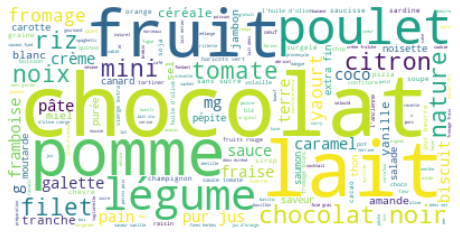

product_name,nombre_entrees,frequence (%)
huile d'olive vierge extra,44,0.069808
lait demi-écrémé,43,0.068221
pois chiches,36,0.057116
lait de coco,33,0.052356
mayonnaise,33,0.052356
orange,33,0.052356
jus de pomme,32,0.050769
jus d'orange,31,0.049183
spaghetti,30,0.047596
moutarde de dijon,28,0.044423


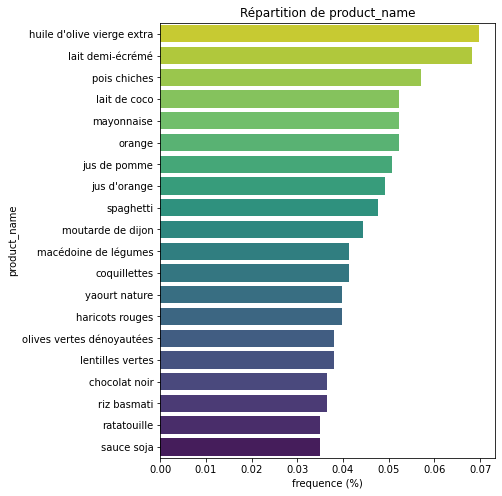

In [18]:
wordcloud_tableau_repartition(df_openfoodfacts_cleaned, 'product_name')

---

**À retenir *'product_name'***

Les produits les plus fréquents dans la base de données sont les produits standards. Il existe un fort potentiel d'utilisation de ces produits par les utilisateurs.

---
---

<span style='background:#12ccb8'> *'brands'*</span>

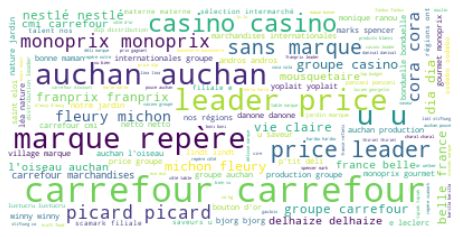

brands,nombre_entrees,frequence (%)
carrefour,2300,3.649056
auchan,1757,2.787561
u,1642,2.605109
leader price,1429,2.267174
casino,1256,1.992702
picard,800,1.269237
cora,778,1.234333
monoprix,576,0.913851
sans marque,531,0.842456
dia,449,0.712359


In [19]:
wordcloud_tableau_repartition(df_openfoodfacts_cleaned, 'brands', graphRepart=False)

---

**À retenir *'brands'***

La majorité des marques des produits sont des marques de grandes enseignes commerciales. Il existe un fort potentiel d'utilisation de ces marques par les utilisateurs.

---
---


<span style='background:#12ccb8'> *'pnns_groups_1'*</span>

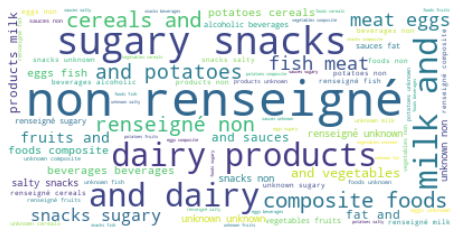

pnns_groups_1,nombre_entrees,frequence (%)
non renseigné,13577,21.540536
sugary snacks,7708,12.229097
unknown,7359,11.675393
milk and dairy products,5534,8.779946
composite foods,5219,8.280184
cereals and potatoes,5159,8.184991
fish meat eggs,4686,7.434555
beverages,4372,6.936380
fruits and vegetables,3211,5.094399
fat and sauces,2757,4.374108


In [20]:
wordcloud_tableau_repartition(df_openfoodfacts_cleaned, 'pnns_groups_1', graphRepart=False)

---

**À retenir *'pnns_groups_1'***

Plus de 30% des entrées ne sont pas associées à aucune catégorie (pnns_groups_1 = non renseigné ou unknown).

Il y a une bonne représentation des catégories associées aux produits non transformés (céréales et pommes de terre, graisses et sauces, poisson, viande, œufs...). La base de données semble avoir un bon potentiel d'utilisation pour la composition de recettes.

---
---

<span style='background:#12ccb8'> *'pnns_groups_2'*</span>

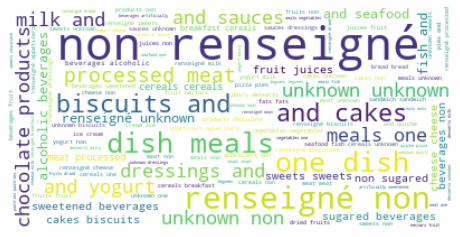

pnns_groups_2,nombre_entrees,frequence (%)
non renseigné,13577,21.540536
unknown,7359,11.675393
one dish meals,4222,6.698398
biscuits and cakes,3219,5.107092
cereals,2615,4.148818
cheese,2578,4.090116
sweets,2360,3.744249
processed meat,2080,3.300016
dressings and sauces,1853,2.939870
milk and yogurt,1771,2.809773


In [21]:
wordcloud_tableau_repartition(df_openfoodfacts_cleaned, 'pnns_groups_2', graphRepart=False)

---

**À retenir *'pnns_groups_2'***

Plus de 30% des entrées ne sont pas associées à aucune catégorie (pnns_groups_2 = non renseigné ou unknown).

La distribution de fréquence des sous-catégories suggère que les produits transformés dominent la base de données.

---
---


<font size="+1"><span style='background:#179c8d'><span style='color:white'>Variables qualitatives odrinales</span></font>  
    

<span style='background:#12ccb8'> *'Nutrition grade'*</span>

In [22]:

nutrition_grade = df_openfoodfacts_cleaned['nutrition_grade_fr'].value_counts().to_frame().reset_index()
nutrition_grade = nutrition_grade.rename(columns={'index':'nutrition_grade_fr', 'nutrition_grade_fr':'nombre_ocurrences'})
nutrition_grade = nutrition_grade.sort_values('nutrition_grade_fr')
nutrition_grade.style.hide(axis="index")


nutrition_grade_fr,nombre_ocurrences
a,9706
b,8639
c,12420
d,15988
e,10986
non renseigné,5291


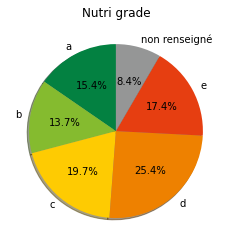

In [23]:

labels = nutrition_grade['nutrition_grade_fr'].tolist()
sizes = nutrition_grade['nombre_ocurrences'].tolist()

# Palette des couleurs du nutri-grade
palette_nutri = {'a': '#038141', 'b': '#85bb2f', 'c': '#fecb02', 'd': '#ee8100', 'e': '#e63e11','non renseigné': '#959696'}
color = list(palette_nutri.values())


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors = color, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Nutri grade')
plt.show()


---

**À retenir *'nutrition_grade_fr'***

- Les notes majoritaires : D, C et E représentent plus de 60% des notes de nutri-score dans notre jeu de données nettoyé.

---
---

<a id='vari_quanti'></a>

## <span style='background:#179c8d'><span style='color:white'>Variables quantitatives</span>
    


<font size="+1"><span style='background:#179c8d'><span style='color:white'>Variables quantitatives continues</span></font>  
    

In [24]:
vari_quanti_conti = df_openfoodfacts_cleaned.select_dtypes(include=['float64']).drop(columns='nutrition-score-fr_100g')
list_vari_quanti_conti = vari_quanti_conti.columns.tolist()


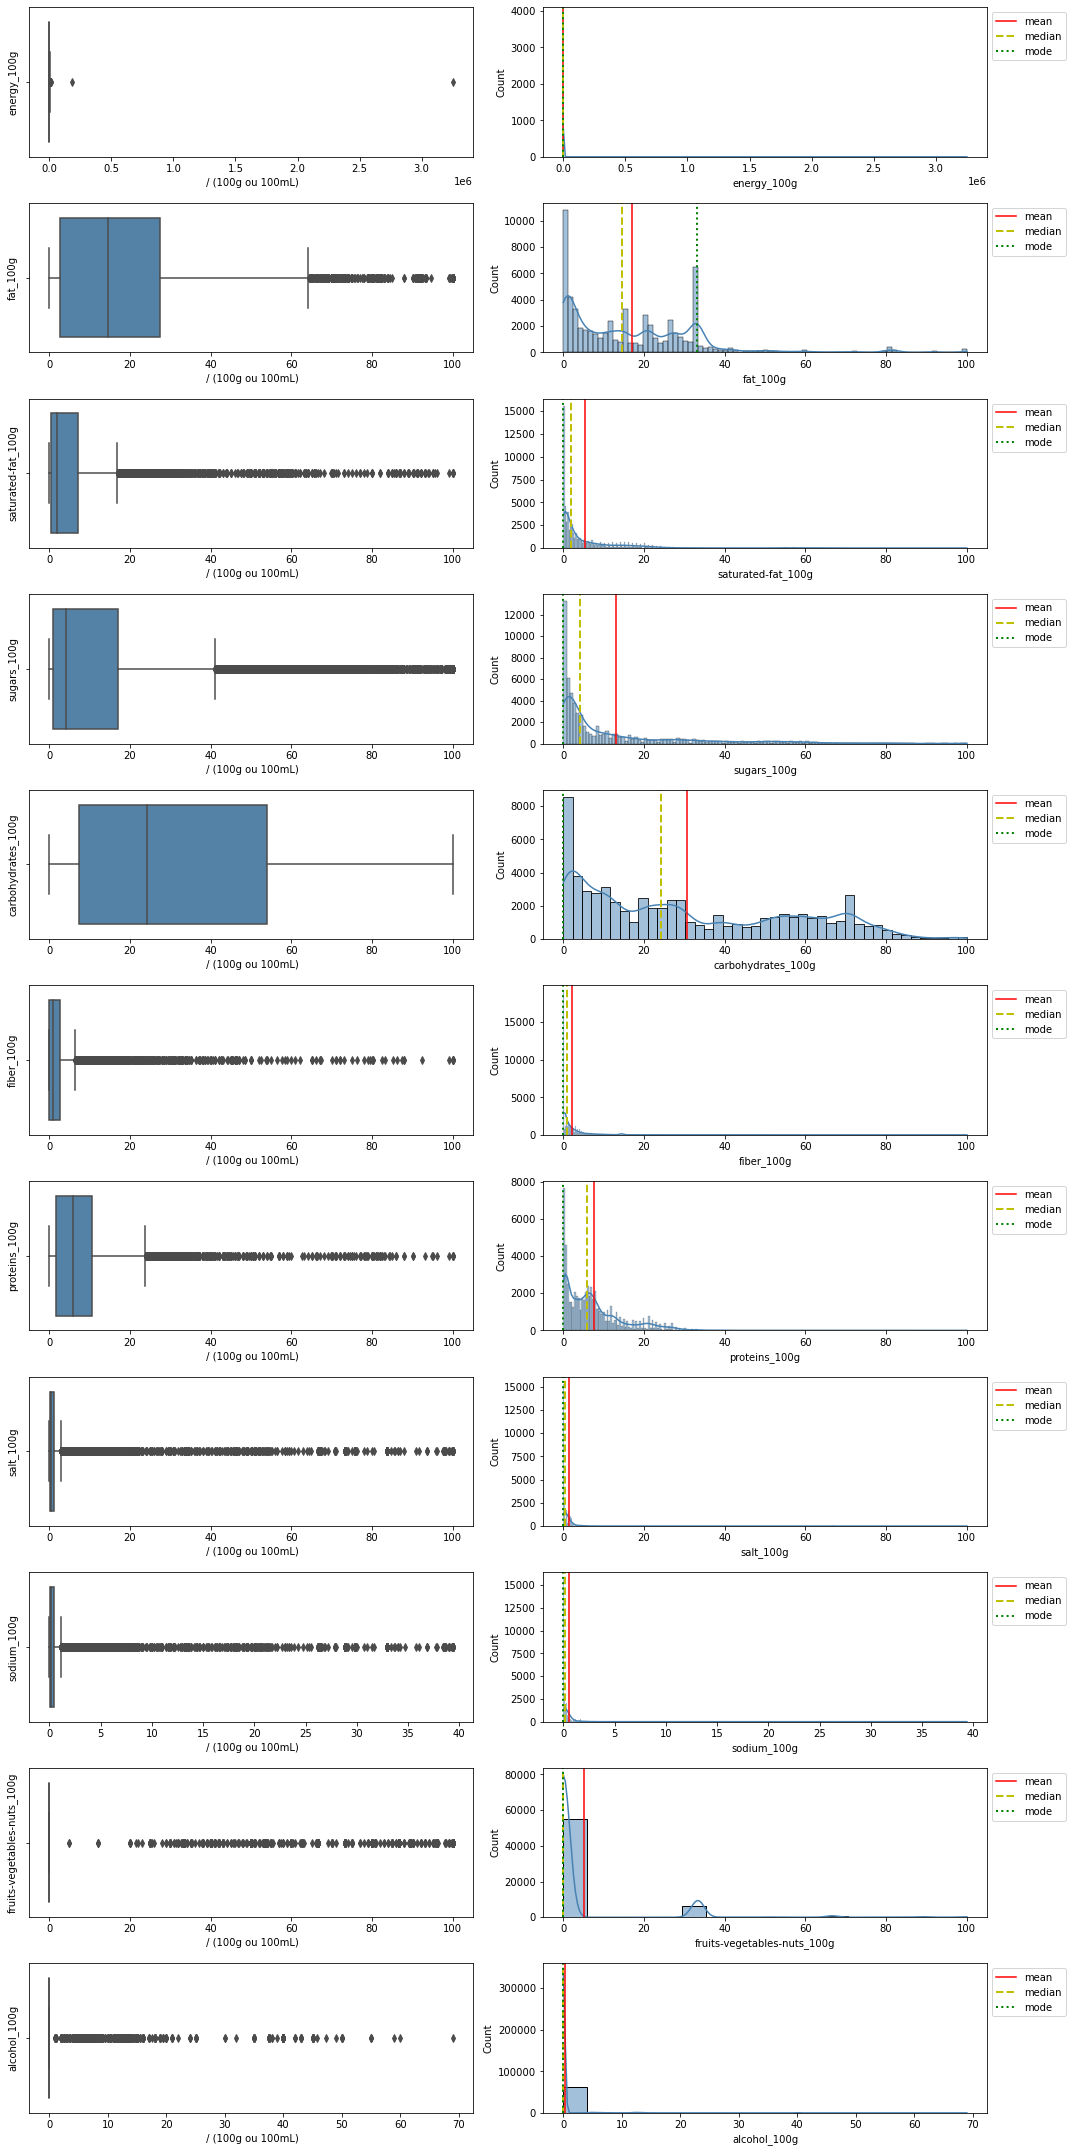

In [25]:

#Nombre graphs
nombre_Graphs = len(list_vari_quanti_conti)

columns = 2  # nombre colonnes
rows = nombre_Graphs  # nombre lignes
pc = 1  # initialisation du compteur de plots

fig = plt.figure(figsize=(15,30))

for vari in range(nombre_Graphs):
    plt.subplot(rows, columns, pc)
    sns.boxplot(data=vari_quanti_conti, x= list_vari_quanti_conti[vari], color='SteelBlue')
    plt.xlabel(" / (100g ou 100mL)")
    plt.ylabel(list_vari_quanti_conti[vari])
    pc = pc + 1
    
    plt.subplot(rows, columns, pc)
    sns.histplot(data=vari_quanti_conti, x= list_vari_quanti_conti[vari], color='SteelBlue', kde=True)
    plt.xlabel(list_vari_quanti_conti[vari])
    plt.axvline(x= vari_quanti_conti[list_vari_quanti_conti[vari]].mean(), color='r', label = 'mean')
    plt.axvline(x= vari_quanti_conti[list_vari_quanti_conti[vari]].median(), color='y',ls='--', lw=2, label='median')
    plt.axvline(x= vari_quanti_conti[list_vari_quanti_conti[vari]].mode()[0], color='g',ls=':', lw=2, label ='mode')
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
    pc = pc + 1

plt.tight_layout()    
plt.show()


**Statistiques descriptives**

In [26]:

stat_descript_variQuantiConti = stat_des(vari_quanti_conti)
stat_descript_variQuantiConti


,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,alcohol_100g
Min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,3.251373e+06,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370000,100.000000,69.000000
Mean,1.148941e+03,17.093195,5.257263,13.086574,30.684838,2.233773,7.589306,1.372565,0.540092,5.129153,0.327348
Median,1.013000e+03,14.500000,1.900000,4.200000,24.300000,0.800000,5.900000,0.500000,0.200000,0.000000,0.000000
Variance,1.687443e+08,278.435430,67.697796,343.587530,669.742518,18.668510,61.189095,34.029758,5.275025,218.118386,7.004534
Standard_deviation,1.299016e+04,16.686385,8.227867,18.536114,25.879384,4.320707,7.822346,5.833503,2.296742,14.768832,2.646608
Skewness,2.485624e+02,1.607444,3.621535,1.942372,0.531151,6.792475,2.322978,11.558403,11.557873,3.354785,12.049908
Kurtosis,6.218212e+04,4.199336,21.882725,3.503466,-0.999557,90.547717,12.142147,147.891724,147.880297,12.776269,175.388974
Mode,1.766700e+02,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


---

**À retenir**

- L'important nombre de valeurs = 0 reflète l'absence de l'une ou l'autre des variables dans un grand nombre de produits, certains produits ne contiennent ni lipides, ni glucides, ni protéines, ni sel...
- Toutes les courbes des variables quantitatives continues sont asymétriques, avec un skewness positif, indiquant une distribution étalée à droite.

---
---


<font size="+1"><span style='background:#179c8d'><span style='color:white'>Variables quantitatives discrètes</span></font>  
    

<span style='background:#12ccb8'> *'Nutrition score'*</span>

In [27]:

vari_quanti_discret = df_openfoodfacts_cleaned['nutrition-score-fr_100g'].to_frame()
list_vari_quanti_discret = vari_quanti_discret.columns.tolist()


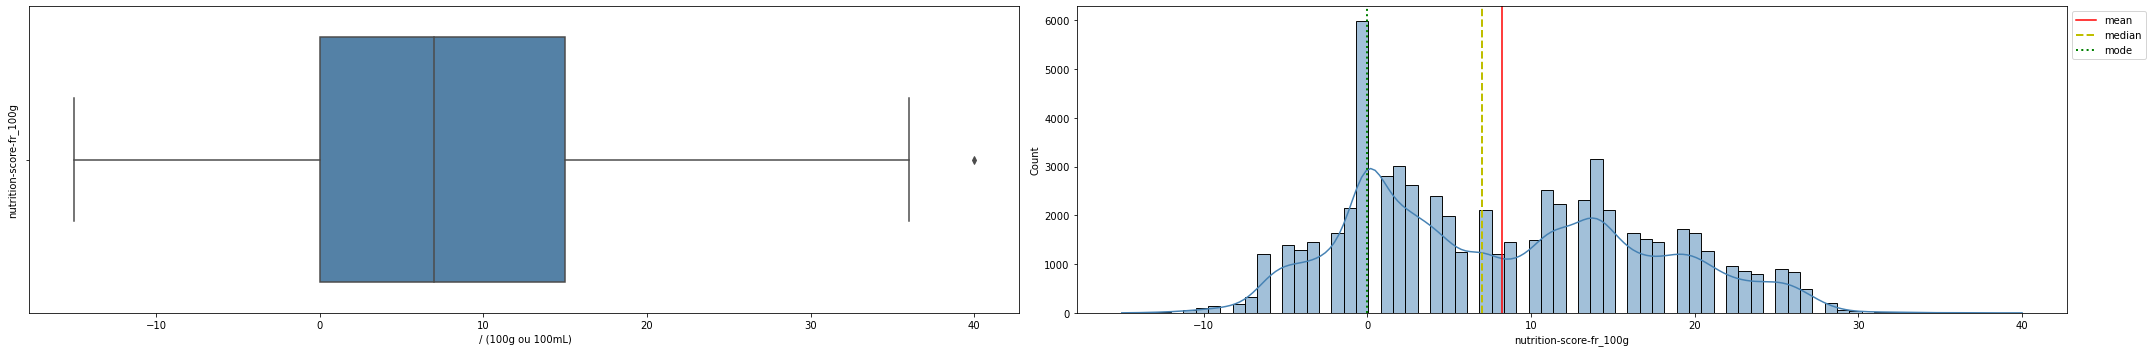

In [28]:

fig = plt.figure(figsize=(30,5))

plt.subplot(1, 2, 1)
sns.boxplot(data=vari_quanti_discret, x= 'nutrition-score-fr_100g', color='SteelBlue')
plt.xlabel(" / (100g ou 100mL)")
plt.ylabel('nutrition-score-fr_100g')
    
plt.subplot(1, 2, 2)
sns.histplot(data=vari_quanti_discret, x= 'nutrition-score-fr_100g', color='SteelBlue', kde=True)
plt.xlabel('nutrition-score-fr_100g')
plt.axvline(x= vari_quanti_discret['nutrition-score-fr_100g'].mean(), color='r', label = 'mean')
plt.axvline(x= vari_quanti_discret['nutrition-score-fr_100g'].median(), color='y',ls='--', lw=2, label='median')
plt.axvline(x= vari_quanti_discret['nutrition-score-fr_100g'].mode()[0], color='g',ls=':', lw=2, label ='mode')
plt.legend(bbox_to_anchor=(1.0, 1), loc='upper left')
  

plt.tight_layout()    
plt.show()


**Statistiques descriptives**

In [29]:
stat_descript_variQuantiDiscr = stat_des(vari_quanti_discret)
stat_descript_variQuantiDiscr

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,alcohol_100g
Min,-15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mean,8.220689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Median,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Variance,79.124420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Standard_deviation,8.895191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Skewness,0.274337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kurtosis,-0.891447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode,NaN,176.67,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Frequence des valeurs de *'nutrition-score-fr_100g'***


| Points aliments solides | Note  |
| --- |  --- |
| -15 -1 |  A |
| 0  2 |  B |
| 3 10 |  C |
| 11 18 |  D  |
| 19 40 |  E |
*Source* : [Calcul Nutri-score](https://www.santepubliquefrance.fr/media/files/02-determinants-de-sante/nutrition-et-activite-physique/nutri-score/qr-scientifique-technique)


In [30]:

freq_disrib_nutri_score = vari_quanti_discret['nutrition-score-fr_100g'].value_counts().to_frame().reset_index()
freq_disrib_nutri_score = freq_disrib_nutri_score.rename(columns={'index':'nutrition-score-fr_100g', 'nutrition-score-fr_100g':'nombre_ocurrences'})
freq_disrib_nutri_score['bin'] =pd.cut(freq_disrib_nutri_score['nutrition-score-fr_100g'], bins=[-15,-1,2,10,18,40], include_lowest=True, right=True)
# include_lowest=True, -1 est inclu dans la première plage
# right=False la plage inclu la valeur de droite

freq_disrib_nutri_score.head()


,nutrition-score-fr_100g,nombre_ocurrences,bin
0,0.0,5985,"(-1.0, 2.0]"
1,14.0,3148,"(10.0, 18.0]"
2,2.0,3011,"(-1.0, 2.0]"
3,1.0,2817,"(-1.0, 2.0]"
4,3.0,2615,"(2.0, 10.0]"


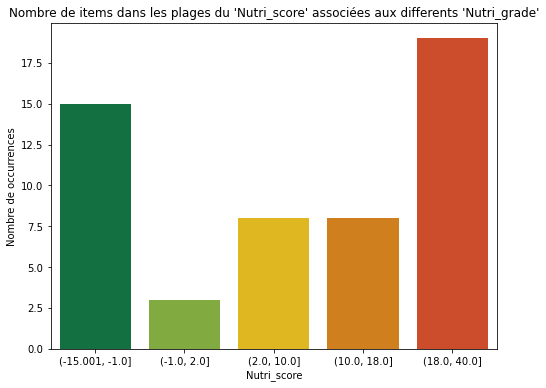

In [31]:

plt.figure(figsize=(8,6))
ax=sns.countplot(x=freq_disrib_nutri_score['bin'], palette = color)
ax.set(xlabel="Nutri_score", ylabel="Nombre de occurrences")
plt.title("Nombre de items dans les plages du 'Nutri_score' associées aux differents 'Nutri_grade'")

plt.show()


---

**À retenir**

* La distribution est bimodale au tour de 0 et 15, ce qui correspond aux plages [-15, -1] et [10, 18], nutri grade A et C respectivement.
* La moyenne et la médiane sont autour d'un score de 7-8 qui correspond au nutri-score C.
* L'amplitude est de -15 à 40 donc tous les nutri-scores sont représentés.
* Le nutri-score D est majoritaire.


<a id='analyses_multivariées'></a>
<br>


---
---

# <span style='background:#178578'><span style='color:white'>**Analyses multivariées** </span></span>


<a id='bivariee_quali_quali'></a>

## <span style='background:#179c8d'><span style='color:white'> Relation entre variables qualitatives</span>

**H0 : les variables sont indépendantes<br>
H1 : les variables NE sont pas indépendantes**

alpha = 0.05

<span style='background:#12ccb8'> *Marque* et *Nutrigrade*</span>

In [32]:
test_chi2(df_openfoodfacts_cleaned['brands'], df_openfoodfacts_cleaned['nutrition_grade_fr'])


Le p_value du Test chi2 est : 0.0

H0 rejetée. Variables non indépendantes. p_value = 0.0 <= alpha = 0.05


<span style='background:#12ccb8'> *Catégorie* et *Nutrigrade*</span>

In [33]:
test_chi2(df_openfoodfacts_cleaned['pnns_groups_1'], df_openfoodfacts_cleaned['nutrition_grade_fr'])


Le p_value du Test chi2 est : 0.0

H0 rejetée. Variables non indépendantes. p_value = 0.0 <= alpha = 0.05


<span style='background:#12ccb8'> *Sub-catégorie* et *Nutrigrade*</span>

In [34]:
test_chi2(df_openfoodfacts_cleaned['pnns_groups_2'], df_openfoodfacts_cleaned['nutrition_grade_fr'])


Le p_value du Test chi2 est : 0.0

H0 rejetée. Variables non indépendantes. p_value = 0.0 <= alpha = 0.05


---

**À retenir**

* Un test de chi2 a été effectué entre des variables qualitatives pour analyser la corrélation entre elles.
* Le coefficient alpha utilisé est de 0,05
* Dans **tous les tests** effectués, l'hypothèse **H0 est rejetée**.
* On peut affirmer avec une confiance de 95% que **les variables** des paires **ne sont pas indépendantes**.

---
---

<a id='bivariee_quanti_quanti'></a>

## <span style='background:#179c8d'><span style='color:white'> Relation entre variables quantitatives</span>


In [35]:

# Matrice de corrélation des variables quantitatives

vari_num_corr = df_openfoodfacts_cleaned.select_dtypes(include=['float64']).corr()
vari_num_corr


,energy_100g,fat_100g,saturated-fat_100g,sugars_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts_100g,alcohol_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.030052,0.031312,0.017438,0.032713,0.021586,0.021216,-0.001831,-0.001834,-0.008183,-0.009022,0.032147
fat_100g,0.030052,1.000000,0.504904,0.045609,0.049002,0.001362,0.113613,-0.002041,-0.002015,-0.013856,-0.065713,0.423845
saturated-fat_100g,0.031312,0.504904,1.000000,0.089148,0.012178,-0.020836,0.154008,-0.004119,-0.004051,-0.048146,-0.054615,0.596959
sugars_100g,0.017438,0.045609,0.089148,1.000000,0.533134,0.046163,-0.218206,-0.005833,-0.005773,-0.083771,-0.078038,0.429328
carbohydrates_100g,0.032713,0.049002,0.012178,0.533134,1.000000,0.181996,-0.036035,-0.041016,-0.040973,-0.229300,-0.110825,0.234825
fiber_100g,0.021586,0.001362,-0.020836,0.046163,0.181996,1.000000,0.145745,0.082383,0.082369,0.017555,-0.063202,-0.181241
proteins_100g,0.021216,0.113613,0.154008,-0.218206,-0.036035,0.145745,1.000000,0.072153,0.072183,-0.183272,-0.112897,0.095963
salt_100g,-0.001831,-0.002041,-0.004119,-0.005833,-0.041016,0.082383,0.072153,1.000000,0.999999,-0.002185,-0.010831,0.024229
sodium_100g,-0.001834,-0.002015,-0.004051,-0.005773,-0.040973,0.082369,0.072183,0.999999,1.000000,-0.002193,-0.010927,0.024290
fruits-vegetables-nuts_100g,-0.008183,-0.013856,-0.048146,-0.083771,-0.229300,0.017555,-0.183272,-0.002185,-0.002193,1.000000,-0.042956,-0.170224


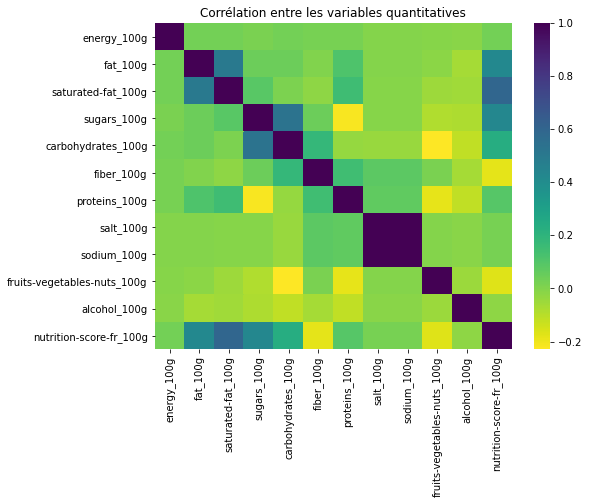

In [36]:

plt.figure(figsize=(8,6))
sns.heatmap(vari_num_corr, cmap="viridis_r")

plt.title("Corrélation entre les variables quantitatives")
plt.tight_layout                     
plt.show()


---

**À retenir**

* La plupart des variables sont peu corrélées.
* L'indice de corrélation entre la plupart des variables est inférieur à |0,2|.
* La variable qui présente la plus forte corrélation avec les autres variables est le *Nutrition_score*. Cette variable est calculée à partir d'autres variables, le résultat observé est conforme aux attentes.
* L'absence de relation entre l'énergie et les graisses et entre l'énergie et les graisses saturées est inattendue.

---
---

<a id='bivariee_quanti_quali'></a>

## <span style='background:#179c8d'><span style='color:white'> Relation entre variables qualitatives et quantitatives </span>

<a id='correl_categ_variNutri'></a>

<font size="+1"><span style='background:#179c8d'><span style='color:white'>Catégorie et variables nutritionnelles</span></font>  


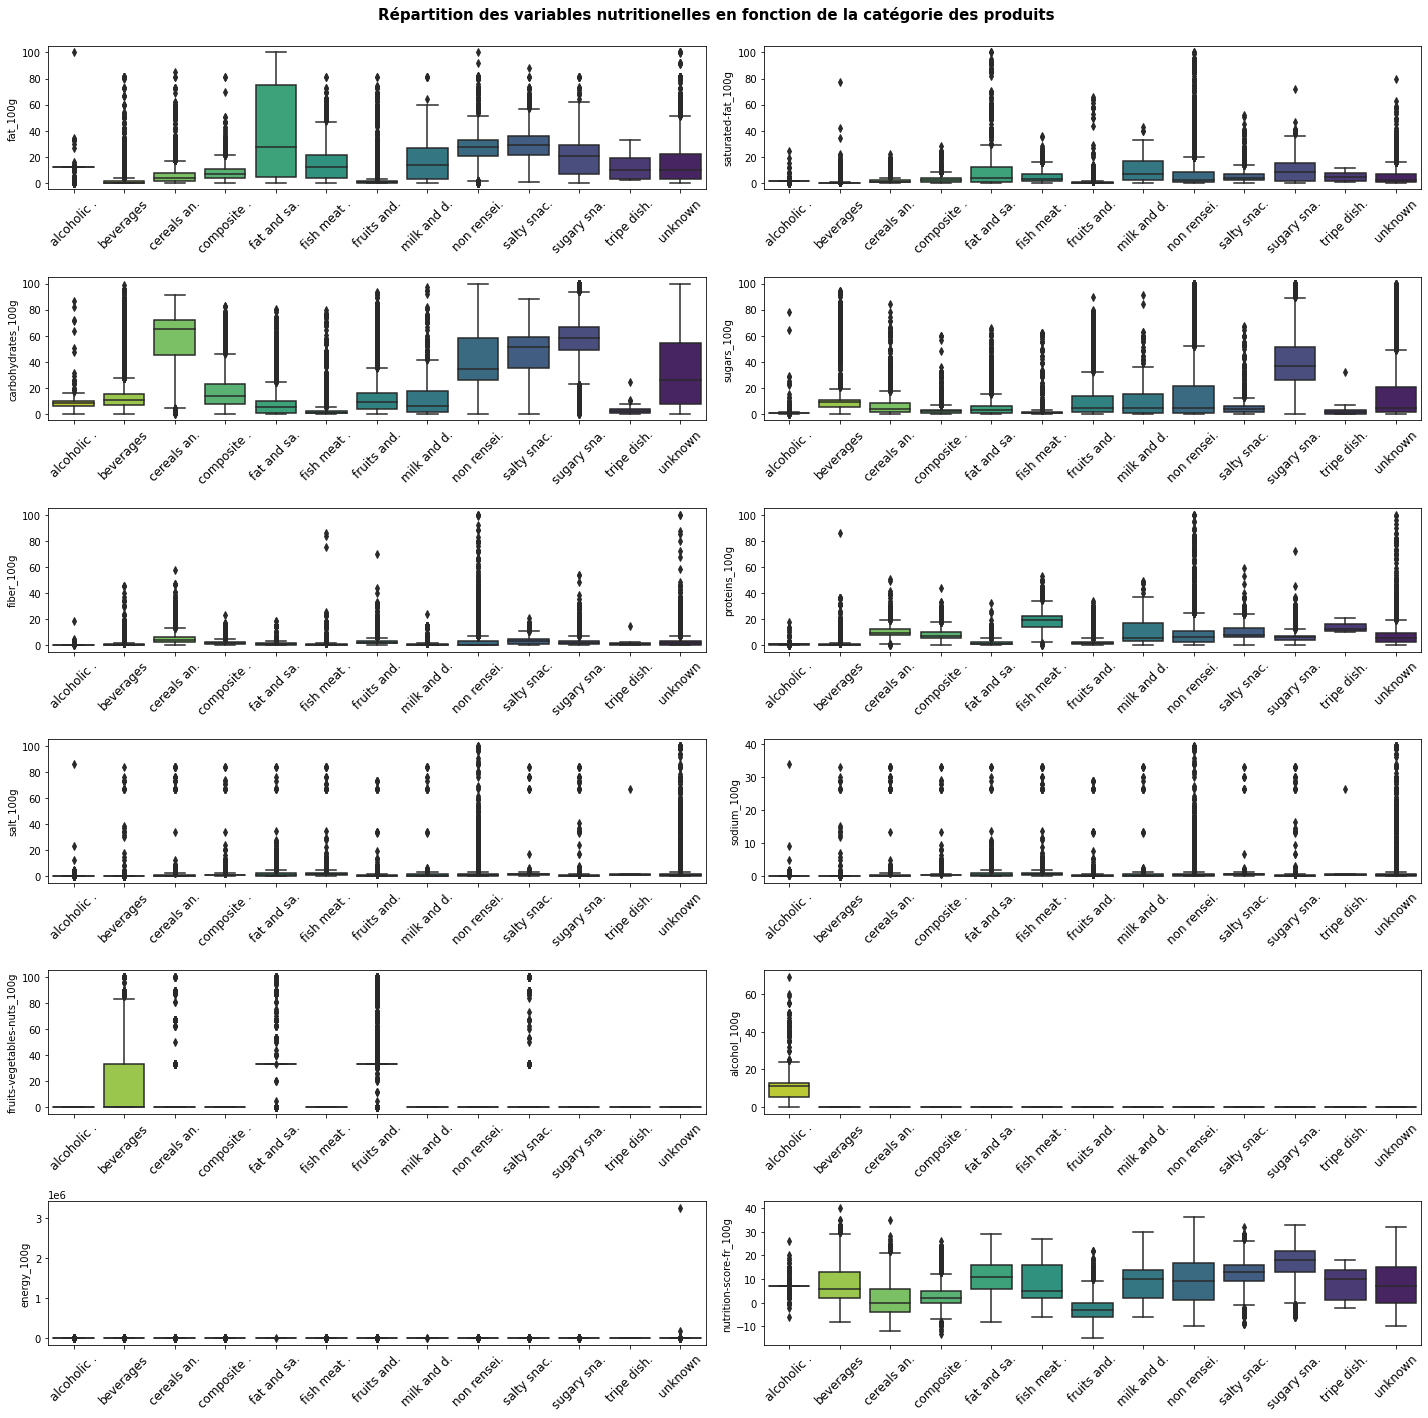

In [37]:

#Préparation des données
correl_pnns1_nutri = df_openfoodfacts_cleaned.select_dtypes(include=['float64'])
correl_pnns1_nutri['pnns_groups_1'] = df_openfoodfacts_cleaned['pnns_groups_1']
correl_pnns1_nutri= correl_pnns1_nutri[['fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g','sodium_100g', 'fruits-vegetables-nuts_100g', 'alcohol_100g','energy_100g', 'nutrition-score-fr_100g', 'pnns_groups_1']]
list_correl_pnns1_nutri = correl_pnns1_nutri.columns.tolist()

#Nombre graphs
nombre_Graphs = len(list_correl_pnns1_nutri)-1

columns = 2  # nombre colonnes
rows = nombre_Graphs  # nombre lignes
pc = 1  # initialisation du compteur de plots


viridis_pnns1 = sns.color_palette(palette="viridis_r", n_colors =len(df_openfoodfacts_cleaned['pnns_groups_1'].unique().tolist()))


fig = plt.figure(figsize=(20,40))

for vari in range(nombre_Graphs):
    plt.subplot(rows, columns, pc)
    ax = sns.boxplot(data=correl_pnns1_nutri, x ='pnns_groups_1' , y = list_correl_pnns1_nutri[vari], palette=viridis_pnns1)
    ax.set(xlabel='', ylabel=list_correl_pnns1_nutri[vari])
    labels = [item.get_text() for item in ax.get_xticklabels()]
    short_labels = [s[0:10]+'.' if len(s) > 10 else s for s in labels]
    ax.axes.set_xticklabels(short_labels)
    plt.xticks(rotation=45, fontsize=12)
    pc = pc + 1

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) 
plt.suptitle('Répartition des variables nutritionelles en fonction de la catégorie des produits', fontsize=15,fontweight='bold')
   
plt.show()

---

**À retenir**

* Les distributions sont conformes à la nature des produits, c.a.d. les matières grasses contiennent beaucoup de lipides ...

---
---

<a id='correl_nutriGr_variNutri'></a>

<font size="+1"><span style='background:#179c8d'><span style='color:white'>Nutritional_grade et variables nutritionnelles</span></font>  

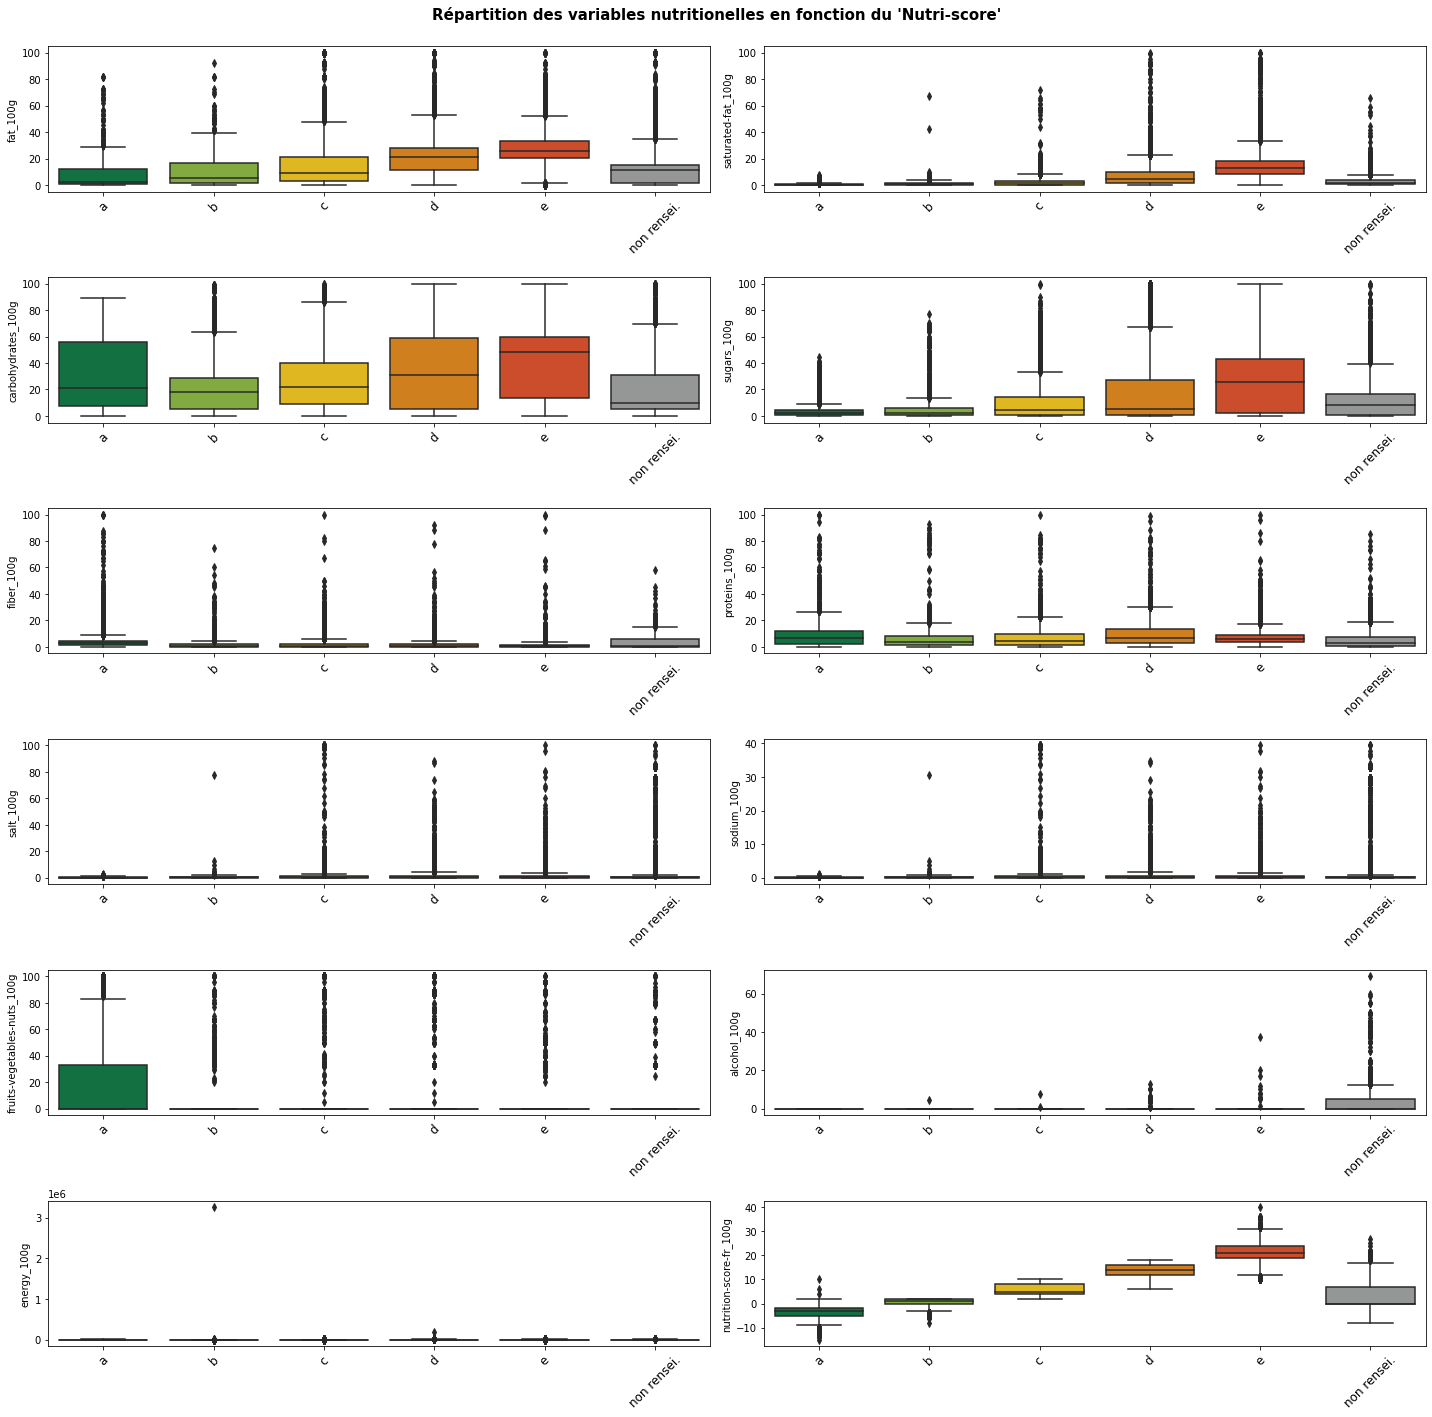

In [38]:

#Préparation des données
correl_pnns1_nutriGr = df_openfoodfacts_cleaned.select_dtypes(include=['float64'])
correl_pnns1_nutriGr['nutrition_grade_fr'] = df_openfoodfacts_cleaned['nutrition_grade_fr']
correl_pnns1_nutriGr= correl_pnns1_nutriGr[['fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g','sodium_100g', 'fruits-vegetables-nuts_100g', 'alcohol_100g','energy_100g', 'nutrition-score-fr_100g', 'nutrition_grade_fr']]
list_correl_pnns1_nutriGr = correl_pnns1_nutriGr.columns.tolist()

#Nombre graphs
nombre_Graphs = len(list_correl_pnns1_nutriGr)-1

columns = 2  # nombre colonnes
rows = nombre_Graphs  # nombre lignes
pc = 1  # initialisation du compteur de plots


viridis_pnns1 = sns.color_palette(palette="viridis_r", n_colors =len(df_openfoodfacts_cleaned['nutrition_grade_fr'].unique().tolist()))


fig = plt.figure(figsize=(20,40))

for vari in range(nombre_Graphs):
    plt.subplot(rows, columns, pc)
    ax = sns.boxplot(data=correl_pnns1_nutriGr, x ='nutrition_grade_fr' , y = list_correl_pnns1_nutri[vari], palette=palette_nutri)
    ax.set(xlabel='', ylabel=list_correl_pnns1_nutri[vari])
    labels = [item.get_text() for item in ax.get_xticklabels()]
    short_labels = [s[0:10]+'.' if len(s) > 10 else s for s in labels]
    ax.axes.set_xticklabels(short_labels)
    plt.xticks(rotation=45, fontsize=12)
    pc = pc + 1

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) 
plt.suptitle("Répartition des variables nutritionelles en fonction du 'Nutri-score'", fontsize=15,fontweight='bold')
   
plt.show()


---

**À retenir**

* Les distributions sont conformes à la description du calcul du nutri-score.
  * Plus un produit contient de graisses, saturées ou insaturées, plus son nutri-score est élevé.
  * Les produits avec nutri-score E contiennent plus de sucre. 
  * Les produits avec nutri-score A contiennent le plus grand pourcentage de fruits_légumes

---
---


<a id='PCA1'></a>

# <span style='background:#178578'><span style='color:white'>**Analyse en composantes pincipales, ACP** </span></span>
    

<a id='prepa_donnees_PCA'></a>

## <span style='background:#179c8d'><span style='color:white'>Préparation des données pour la ACP</span>


In [39]:

# Sélection des variables
variables_nutri = df_openfoodfacts_cleaned.select_dtypes(include=['float64']).drop(columns = ['saturated-fat_100g','sugars_100g', 'sodium_100g'])

nutri_grade = df_openfoodfacts_cleaned['nutrition_grade_fr'].to_frame()
LE = LabelEncoder()
nutri_grade['Nutri-Score'] = LE.fit_transform(nutri_grade['nutrition_grade_fr'])
nutri_grade = nutri_grade.drop(columns = ['nutrition_grade_fr'])
nutri_grade

variables_PCA = pd.concat([variables_nutri, nutri_grade], axis = 1)

# Matrice des données
X = variables_PCA.values

# features
features = variables_PCA.columns


In [40]:

#---------
# Scaling
#---------

# On instancie :
scaler = StandardScaler()

# On fit et on transforme : 
X_scaled = scaler.fit_transform(X)


In [41]:

# Vérification moyenne = o et écart type =1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]


,0,1,2,3,4,5,6,7,8,9
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<a id='PCA'></a>

## <span style='background:#179c8d'><span style='color:white'>PCA</span>


In [42]:

# Nombre de composantes
nombre_comp = len(variables_PCA.columns)

# On instancie notre ACP :
pca = PCA(n_components=nombre_comp)


In [43]:

# On l'entraine sur les données scalées :
pca.fit(X_scaled)


PCA(n_components=10)

In [44]:

# Variance captée par chaque nouvelle composante
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
print(scree)

# Liste des composantes :
x_list = range(1, nombre_comp+1)


[21.06 13.78 11.3  10.92 10.13  9.9   8.9   6.47  5.47  2.09]


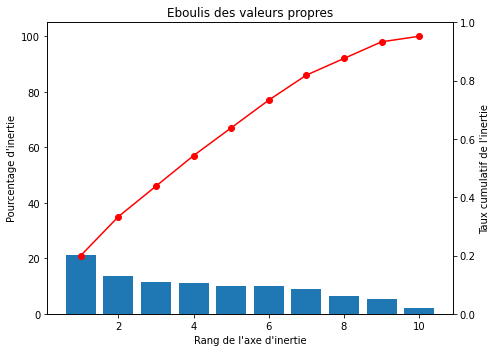

In [45]:

fig = plt.figure(figsize=(7,5))

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.set_ylabel("Taux cumulatif de l'inertie")
ax1.set_xlabel("Rang de l'axe d'inertie")
ax1.set_ylabel("Pourcentage d'inertie")

plt.title("Eboulis des valeurs propres")

plt.tight_layout()
plt.show(block=False)



Aucun coude sur le graphique de l'éboulis des valeurs propres. Les composantes PC5 à PC10 expliquent chacune moins de 10% de la variance. <br>
La première composante explique pour 21% la variance totale.


In [46]:

#------------------------
# Composantes principales
#------------------------

# Tableau avec la proportion de la variabilité de chaque composante principale expliquée par chacune de variables
pcs = pd.DataFrame(pca.components_.round(2), index = [f"PC{i}" for i in x_list], columns = features).T
pcs


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
energy_100g,0.05,0.09,-0.01,0.10,0.48,0.85,0.14,0.00,0.02,-0.00
fat_100g,0.40,0.04,0.25,0.41,0.02,-0.03,-0.31,0.69,-0.12,-0.14
carbohydrates_100g,0.22,0.42,-0.54,-0.02,0.29,-0.23,0.11,-0.04,-0.55,-0.16
fiber_100g,-0.08,0.53,0.13,-0.22,0.41,-0.18,-0.51,-0.05,0.39,0.17
proteins_100g,0.12,0.44,0.40,-0.09,-0.50,0.28,-0.20,-0.33,-0.38,-0.08
salt_100g,0.08,0.08,0.56,-0.44,0.25,-0.18,0.55,0.24,-0.16,0.07
fruits-vegetables-nuts_100g,-0.24,-0.29,0.37,0.40,0.43,-0.21,-0.18,-0.39,-0.39,-0.01
alcohol_100g,0.05,-0.44,-0.11,-0.60,0.07,0.16,-0.48,0.15,-0.36,0.15
nutrition-score-fr_100g,0.62,-0.08,-0.02,0.14,0.00,-0.05,0.07,-0.25,0.04,0.72
Nutri-Score,0.56,-0.22,0.08,-0.18,0.14,-0.06,-0.05,-0.34,0.28,-0.61


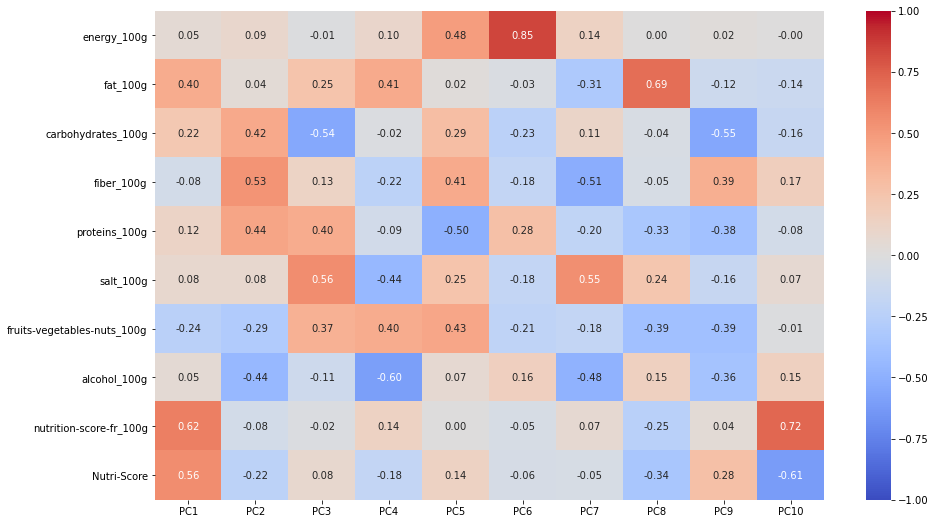

In [47]:

# Graphique de correlation entre les variables et les composantes principales
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(pcs, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.show(block=False)


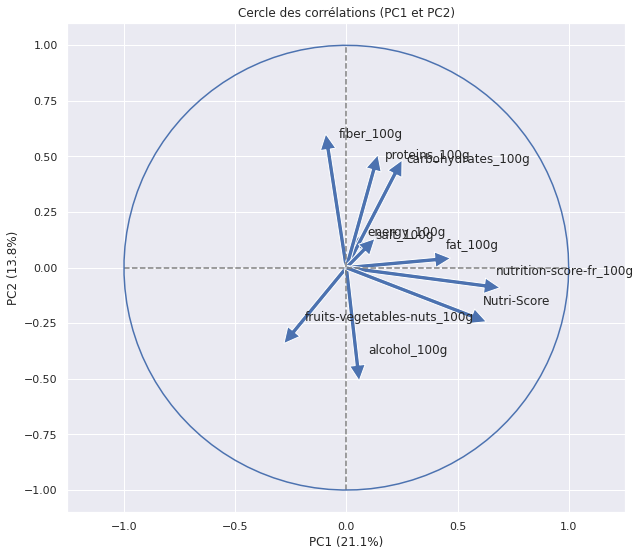

In [48]:

#--------------------------
# Graphique de correlations
#--------------------------

# Graphique de correlation des deux premières composantes PC1 et PC2
sns.set()
x_y = (0,1)
correlation_graph(pca, x_y, features)


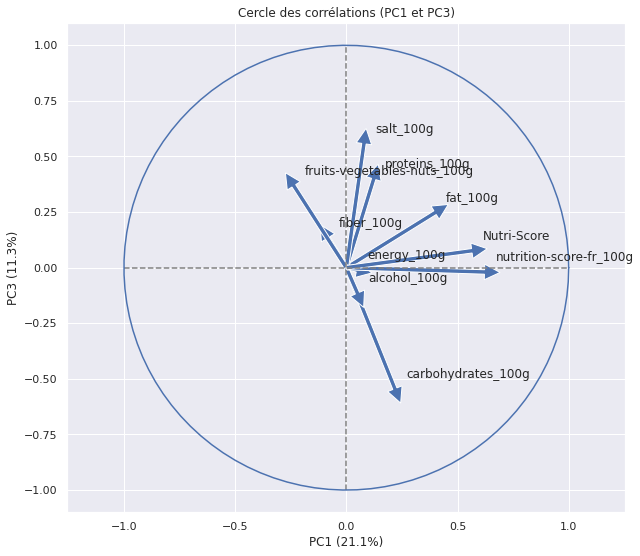

In [49]:

# Graphique de correlation des composantes PC1 et PC3
x_y = (0,2)
correlation_graph(pca, x_y, features)


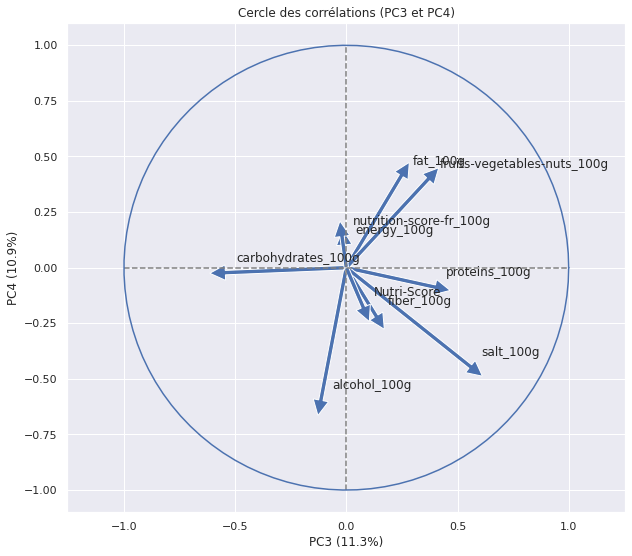

In [50]:

# Graphique de correlation des composantes PC3 et PC4
x_y = (2,3)
correlation_graph(pca, x_y, features)


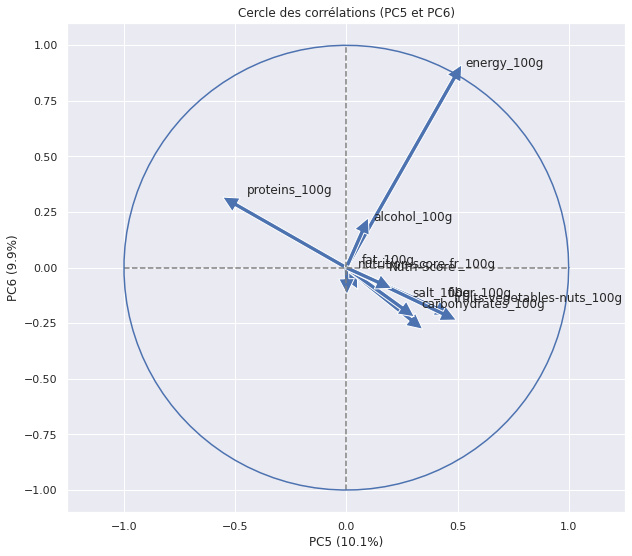

In [51]:

# Graphique de correlation des composantes PC5 et PC6
x_y = (4, 5)
correlation_graph(pca, x_y, features)


<a id='projectionPCA'></a>

## <span style='background:#179c8d'><span style='color:white'>Projection</span>


In [52]:

#Calcule des coordonnées de nos individus (lignes du df) dans le nouvel espace
X_proj = pca.transform(X_scaled)


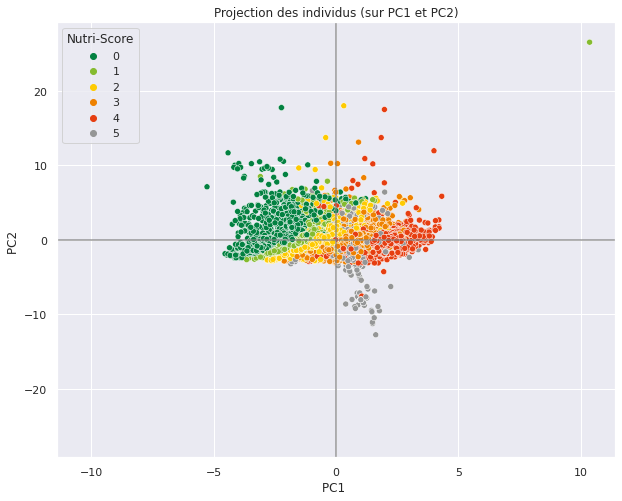

In [53]:

# Projection des produits (lignes). Les couleurs correspondent au NutriScore (0 = A, 1 = B, ..., 5 = non renseigné) 
x_y = [0,1]
display_factorial_planes(X_proj, x_y, clusters=variables_PCA['Nutri-Score'])


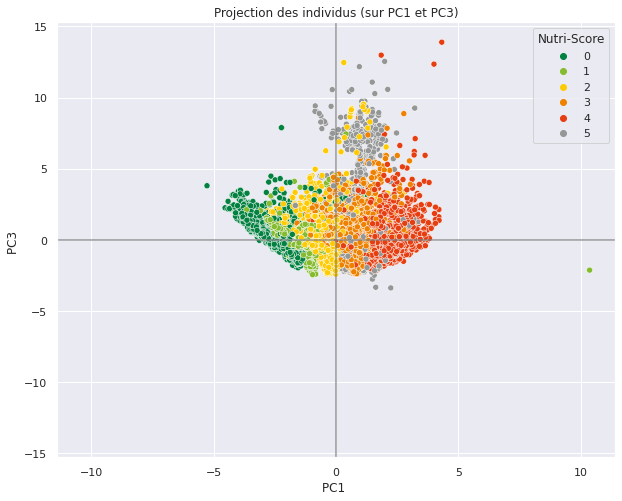

In [54]:

# Projection des produits (lignes). Les couleurs correspondent au NutriScore (0 = A, 1 = B, ..., 5 = non renseigné) 
x_y = [0, 2]
display_factorial_planes(X_proj, x_y, clusters=variables_PCA['Nutri-Score'])


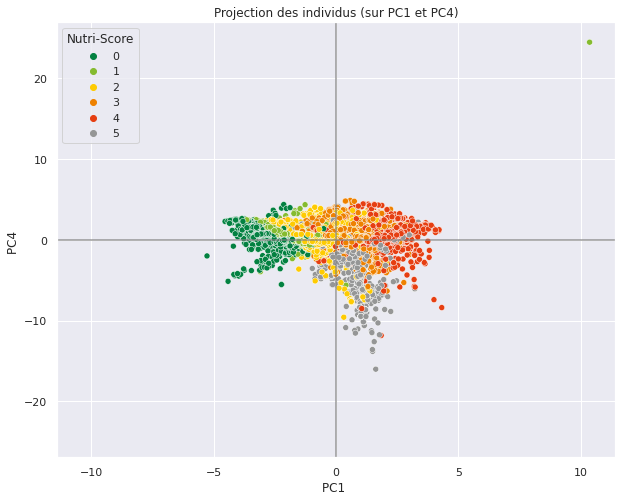

In [55]:

# Projection des produits (lignes). Les couleurs correspondent au NutriScore (0 = A, 1 = B, ..., 5 = non renseigné) 
x_y = [0, 3]
display_factorial_planes(X_proj, x_y, clusters=variables_PCA['Nutri-Score'])


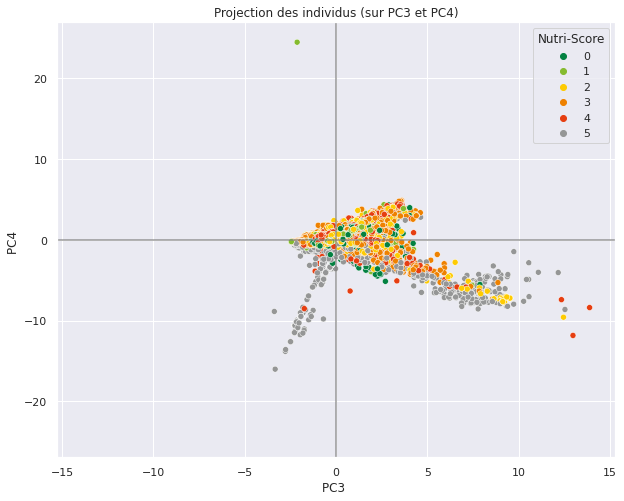

In [56]:

# Projection des produits (lignes). Les couleurs correspondent au NutriScore (0 = A, 1 = B, ..., 5 = non renseigné) 
x_y = [2, 3]
display_factorial_planes(X_proj, x_y, clusters=variables_PCA['Nutri-Score'])


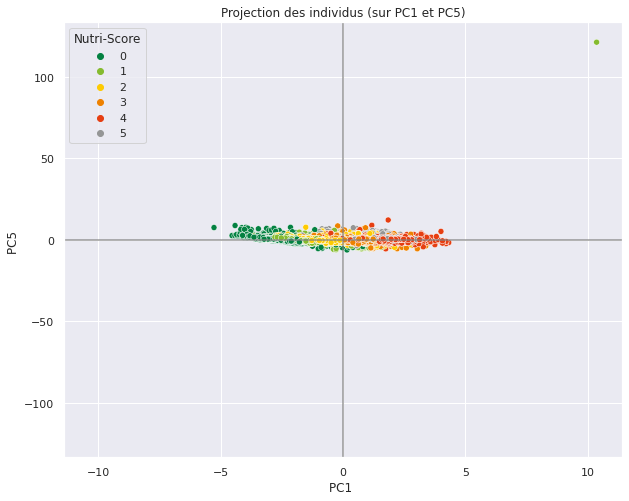

In [57]:

# Projection des produits (lignes). Les couleurs correspondent au NutriScore (0 = A, 1 = B, ..., 5 = non renseigné) 
x_y = [0, 4]
display_factorial_planes(X_proj, x_y, clusters=variables_PCA['Nutri-Score'])


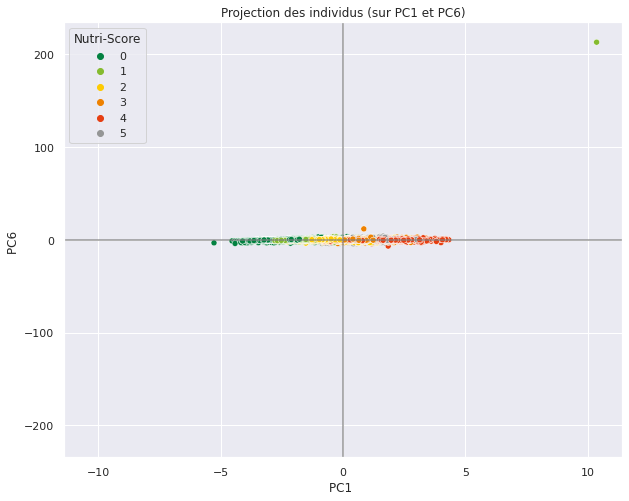

In [58]:

# Projection des produits (lignes). Les couleurs correspondent au NutriScore (0 = A, 1 = B, ..., 5 = non renseigné) 
x_y = [0, 5]
display_factorial_planes(X_proj, x_y, clusters=variables_PCA['Nutri-Score'])


---

**À retenir**

* Le graphique d'éboulis ne montre pas de coude. La première composante explique pour 21% la variance totale. 
  * Les six premières composantes expliquent plus d'un 80% de la variance.
  * Les composantes PC5 à PC10 expliquent chacune moins de 10% de la variance.<br>
<br>  

* Les variables qu'ont le plus d'influence sur les deux premières composantes (**PC1 et PC2**) principales sont le nutri-score, la punctuation 'nutritional_score', les glucides, fibres et proteines.

* La projection des informations sur le nutri-score sur le graphique de dispersion résultant de l'analyse PCA, montre que les categories du nutri-score (A à E) sont bien distribuées le long de l'axe PC1.

* Les différences dans la distribution des données sur les axes **PC3 et PC4** sont dues à un poids plus important des variables glucides et protéines sur l'axe 3 et des variables alcool et graisses sur l'axe 4.

* Les axes **PC5 et PC6** informent plus sur des données exceptionnelles (la variable qui a le plus de poids sur ces axes est l'énergie) que sur l'ensemble du jeux de données. 
<br>

---
---


<a id='clusters'></a>

# <span style='background:#178578'><span style='color:white'>**Cluster** </span></span>



Dans un premier temps, le calcul des clusters a été tenté sur l'ensemble du jeu de données. Le calcul n'a pas été possible, car lorsque la commande ```{Z = linkage(X, 'ward')}``` était lancée, une défaillance du kernel se produisait immédiatement.

Il a été décidé d'effectuer le calcul des clusters sur un échantillon du dataset.


<a id='data_prep_cluster'></a>

## <span style='background:#179c8d'><span style='color:white'>Préparation des données</span>


In [59]:

#Pour créer un sub-dataset la méthode suivante a été utilisée  :
#df_openfoodfacts_cleaned_small = df_openfoodfacts_cleaned.loc[np.random.choice(df_openfoodfacts_cleaned.index, 5000, replace=False)]

#Pour utiliser un jeu de données stable, j'ai enregistré celui généré par la méthode décrite précédemment. 
#df_openfoodfacts_cleaned_small.to_csv('df_openfoodfacts_cleaned_small.csv', sep='\t', encoding='utf_8', index=False)

# Le sub-dataset est chargé ci-dessous.
df_openfoodfacts_cleaned_small = pd.read_csv('df_openfoodfacts_cleaned_small.csv', sep='\t', low_memory=False, encoding='utf-8')

In [60]:

# Variable avec les noms des produits dans le dataset
names = df_openfoodfacts_cleaned_small['pnns_groups_2']

# Variable avec les catégories attrivuées aux produits dans le dataset
nutriScore = df_openfoodfacts_cleaned_small['nutrition_grade_fr']

# Valeurs des variables nutritionnelles numériques
df_cluster = df_openfoodfacts_cleaned_small.copy()
df_cluster = df_cluster.select_dtypes(include=['float64']).drop(columns = ['saturated-fat_100g','sugars_100g', 'sodium_100g'])
X = df_cluster.values
                             


In [61]:

#---------
# Scaling
#---------

# On instancie :
std_scale = preprocessing.StandardScaler()

# On fit et on transforme : 
X_scaled = std_scale.fit_transform(X)
X_scaled[:5]


array([[ 1.38236968,  0.68118909,  1.3361199 , -0.04896444, -0.10741904,
        -0.20085911, -0.42976612, -0.14789133,  1.94655674],
       [-1.13008731, -0.11401531, -0.66617922, -0.60982721, -1.00567821,
         0.74024594, -0.42976612,  3.43905744, -0.31102736],
       [ 1.40802008,  0.86936723,  1.17557755, -0.04896444, -0.22076405,
        -0.09027927, -0.42976612, -0.14789133,  1.83367754],
       [-0.25669108, -0.43573923, -0.09382707, -0.36585191,  0.23261597,
         0.00853676, -0.42976612, -0.14789133, -0.64966498],
       [ 1.5811603 ,  1.27607482,  0.84702577,  1.46536503, -0.34827718,
        -0.24791436, -0.42976612, -0.14789133,  1.49503992]])

In [62]:

# Vérification moyenne = o et écart type =1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]


,0,1,2,3,4,5,6,7,8
mean,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<a id='clustering'></a>

## <span style='background:#179c8d'><span style='color:white'>Clustering</span>


In [63]:

# Linkage
Z = linkage(X, 'ward')


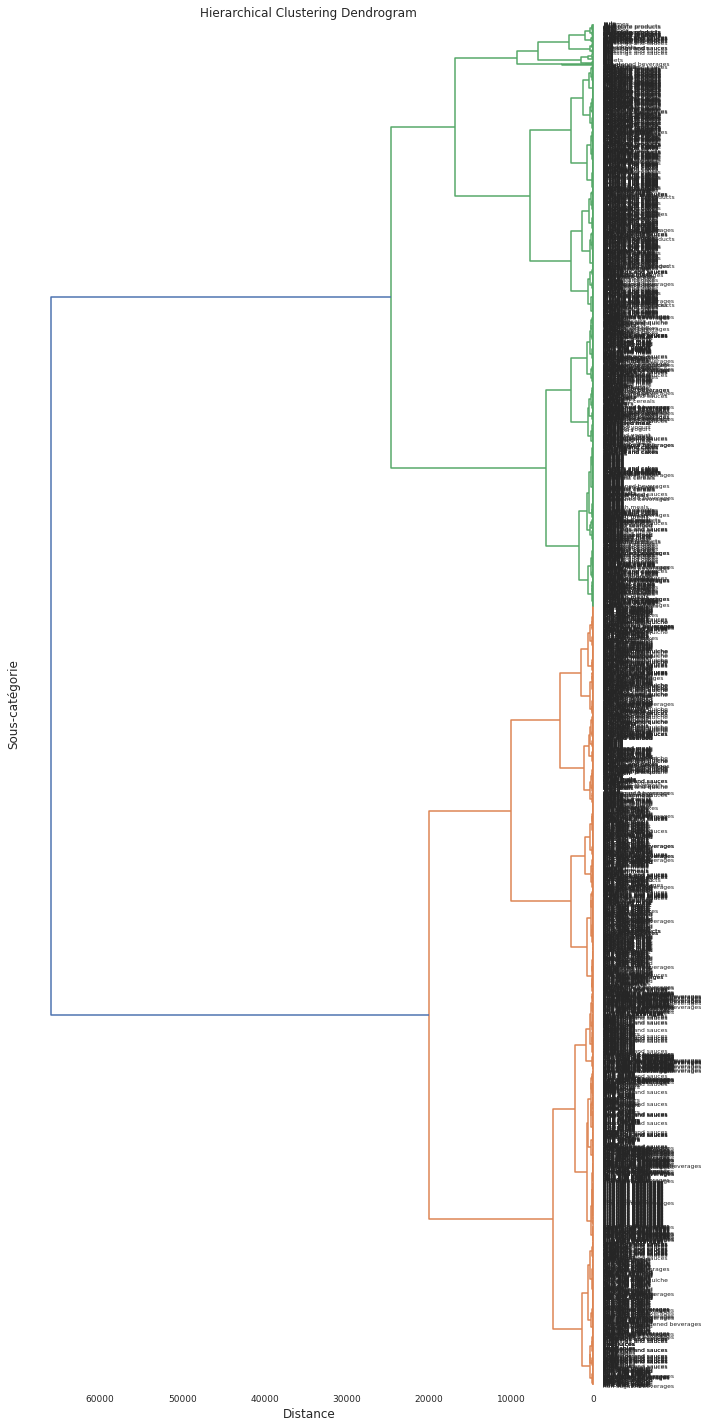

In [64]:

# Dendrogramme
fig, ax = plt.subplots(1, 1, figsize=(10,20))

_ = dendrogram(Z, labels=list(names), ax = ax, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Sous-catégorie")
ax.tick_params(axis='x', which='major', labelsize=9)
ax.tick_params(axis='y', which='major', labelsize=6)

plt.tight_layout()
plt.show()


In [65]:

# Définir le nombre de clusters qu'on souhaite:
k=5

clusters = fcluster(Z, k, criterion='maxclust')
clusters


array([4, 1, 4, ..., 2, 1, 1], dtype=int32)

In [66]:

#Table de contingence
crosstab = pd.crosstab(nutriScore, clusters, dropna=False)
crosstab.rename_axis(columns="cluster", index="nutriScore", inplace=True)
crosstab


cluster,1,2,3,4,5
nutriScore,,,,,
a,380,179,234,5,1
b,296,273,58,14,0
c,271,459,108,96,17
d,89,363,401,308,57
e,130,38,146,461,62
non renseigné,278,104,119,36,17


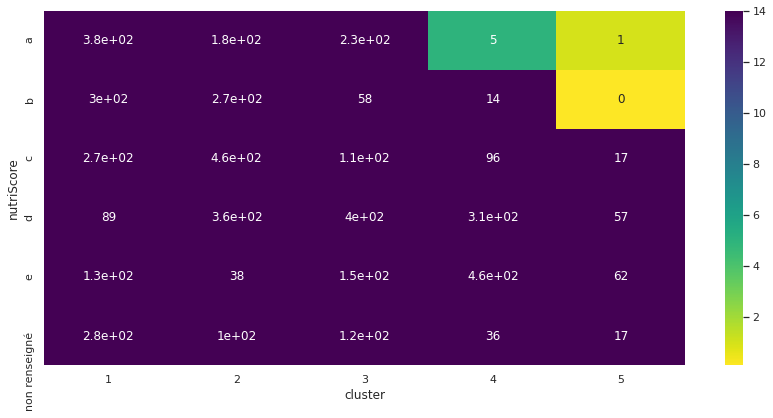

In [67]:

fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.heatmap(crosstab, vmin=0.1, vmax=14, annot=True, cmap="viridis_r")

plt.tight_layout()
plt.show()


In [68]:

# Tableau avec l'information des sub-catégories, nutri-score et cluster
df_pnns_clusters = pd.DataFrame({"sub-catégorie pnns_2" : names, "Nutri-Score" : nutriScore, "cluster" : clusters}).sort_values("cluster")
df_pnns_clusters.head(10)


,sub-catégorie pnns_2,Nutri-Score,cluster
2499,fruit juices,c,1
2451,alcoholic beverages,non renseigné,1
2450,fruit juices,c,1
2444,alcoholic beverages,non renseigné,1
2438,fruits,a,1
2430,cereals,a,1
2429,fruits,a,1
2421,sweetened beverages,non renseigné,1
2419,dressings and sauces,b,1
2412,vegetables,a,1


In [69]:

# Sub-catégories les plus frequentes par cluster
pd.options.display.max_rows = None
df_pnns_clusters.groupby("cluster")["sub-catégorie pnns_2"].value_counts()


cluster  sub-catégorie pnns_2            
1        alcoholic beverages                 185
         vegetables                          160
         milk and yogurt                     158
         fruit juices                        152
         sweetened beverages                 119
         one dish meals                      116
         non sugared beverages               111
         fruits                              100
         dressings and sauces                 75
         fish and seafood                     51
         soups                                37
         fruit nectars                        35
         cheese                               24
         legumes                              24
         cereals                              23
         artificially sweetened beverages     22
         dairy desserts                       16
         meat                                 12
         sweets                                8
         potatoes          

---

**À retenir**


Des produits associés aux différentes sous-catégories sont trouvés dans la plupart des clusters.

L'analyse des sous-catégories associées aux produits inclus dans chacun des clusters suggère qu'il existe une relation entre les caractéristiques nutritionnelles des produits et les clusters dans lesquels ils sont inclus.<br>
Les sous-catégories et les caractéristiques nutritionnelles les plus fréquentes par cluster sont:
* Cluster 1 : alcoholic beverages , vegetables , milk and yogurt , fruit juices  , sweetened beverages , one dish meals, non sugared beverages , fruits     . Ce cluster semble regrouper des produits pauvres en protéines.
* Cluster 2 : o one dish meals,  processed mea, fish and seafood, sweets, meat , cheese,  dairy desserts, dressings and sauces, sandwich,  pizza pies and quiche, milk and yogurt. Ce cluster semble regrouper des produits contenant plusieurs des composantes nutritionnelles basiques (glucides, graisses...) et riches en protéines.
* Cluster 3 : cereals, cheese,  sweets,  biscuits and cakes, bread, processed meat, breakfast cereals, pastries. Ce cluster semble regrouper  des produits riches en glucides, graisses et sucres.
* Cluster 4 : biscuits and cakes, chocolate products, appetizers, sweets,  breakfast cereals, bread. Ce cluster semble regrouper des produits riches en glucides et en sucres.
* Cluster 5 : fats, nuts, chocolate products, dressings and sauces. Ce cluster regroupe des produits riches en graisses.

---
---

<a id='regimeCeto_gluci_nutriScore'></a>

# <span style='background:#178578'><span style='color:white'>**Régime cétogène, retation entre la teneur en glucides et le nutri-score** </span></span>



L'un des objectifs de chef cloud est de proposer plusieurs recettes avec des nutri-scores différents à partir des mêmes ingrédients pour aider les utilisateurs à améliorer leur hygiène alimentaire.
L'un des objectifs du nutri-score est de participer à l'éducation nutritionnelle et, entre autres, de contribuer à réduire le surpoids.

Il existe désormais un régime pour perdre du poids qui consiste à réduire radicalement l'apport en glucides (régime cétogène).

Nous voulons vérifier s'il existe une relation significative entre la teneur en glucides et le nutri-score.

L'ANOVA à sens unique, *one-way ANOVA*, teste la relation entre le prédicteur catégorique (*nutri-score*) et la réponse continue(*teneur en glucides*).


<a id='test_ANOVA'></a>

## <span style='background:#179c8d'><span style='color:white'> ANOVA </span>


<span style='color:#178578'>**Conditions pour le test d'hypothèse *one-way ANOVA***</span>


* [ ] 1 - Les **échantillons sont indépendants** les uns des autres. <br>
* [ ] 2 - Les données sont **normalement distribuées**. Les valeurs de chaque groupe échantillonné sont supposées être tirées de populations normalement distribuées. <br> 
* [ ] 3 - **Homogénéité de la variance**, homoscédasticité. Il n'y a pas des différences significatives entre les variances des groupes. <br>



---

* [x] 1 - Les **échantillons sont indépendants** les uns des autres. <br>
  * Les données d'un échantillon sont sélectionnées au hasard dans des populations.<br>
<br>
Nous partons du principe que les produits labellisés avec un nutri-score dans les jeux de données ont été sélectionnées au hasard parmi la totalité des produits labellisés avec ce nutri-score dans le marché.



---

* [x] 2 - Les données sont **normalement distribuées**. Les valeurs de chaque groupe échantillonné sont supposées être tirées de populations normalement distribuées. <br> 


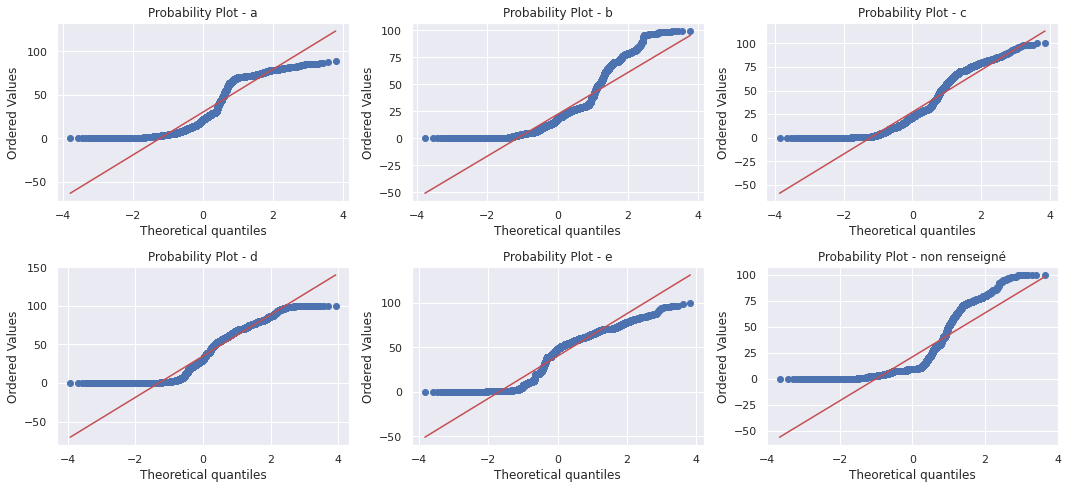

In [70]:

unique_nutriGrade = df_openfoodfacts_cleaned['nutrition_grade_fr'].sort_values().unique()

#Nombre graphs
nombre_Graphs = len(unique_nutriGrade)

columns = 3  # nombre colonnes
rows = nombre_Graphs  # nombre lignes
pc = 1  # initialisation du compteur de plots

fig = plt.figure(figsize=(15,20))

for nutriGrade in unique_nutriGrade:
    plt.subplot(rows, columns, pc)
    stats.probplot(df_openfoodfacts_cleaned[df_openfoodfacts_cleaned['nutrition_grade_fr'] == nutriGrade]['carbohydrates_100g'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  nutriGrade)
    pc = pc + 1

plt.tight_layout()
plt.show()
    


Les **diagrammes Quantile-Quantile, ou diagrammes Q-Q ou Q-Q plot**, sont des outils graphiques permettant d'évaluer la pertinence de l'ajustement d'une distribution donnée à un modèle théorique.
Sur l’axe des x il s’agit des quantiles théoriques. Ces quantiles sont ceux de la distribution normale centrée réduite.

La distribution peut être supposée normale quand les points (en bleu) s’alignent le long de la droite (rouge). 

Dans le cas présent les Q-Q plots se rapronchent du type *Heavy tailed*,  comparé à la distribution normale il y a un beaucoup plus de données dans les extrémités que dans le centre de la distribution.


In [71]:

# test de distribution normale des la teneur de glucides dans les différents nutri-scores
# test D'Agostino and Pearson's, adapté à échantillons de taille moyenne et grande

#H0: distribution normale

for nutriGrade in unique_nutriGrade:
    alpha = 0.05
    k2, p = stats.normaltest(df_openfoodfacts_cleaned[df_openfoodfacts_cleaned['nutrition_grade_fr'] == nutriGrade]['carbohydrates_100g'])
    
    print("p = {:g}".format(p))
    if p < alpha:  
        print("L'hypothèse nulle peut être réjetée. La teneur de glucides des produits avec nutri-score '{}' ne suit pas une distribution normale\n".format(nutriGrade))
    else:
        print("L'hypothèse nulle ne peut pas être réjetée. La teneur de glucides des produits avec nutri-score '{}' suit une distribution normale\n".format(nutriGrade))
        

p = 0
L'hypothèse nulle peut être réjetée. La teneur de glucides des produits avec nutri-score 'a' ne suit pas une distribution normale

p = 0
L'hypothèse nulle peut être réjetée. La teneur de glucides des produits avec nutri-score 'b' ne suit pas une distribution normale

p = 3.64411e-262
L'hypothèse nulle peut être réjetée. La teneur de glucides des produits avec nutri-score 'c' ne suit pas une distribution normale

p = 0
L'hypothèse nulle peut être réjetée. La teneur de glucides des produits avec nutri-score 'd' ne suit pas une distribution normale

p = 0
L'hypothèse nulle peut être réjetée. La teneur de glucides des produits avec nutri-score 'e' ne suit pas une distribution normale

p = 1.43409e-232
L'hypothèse nulle peut être réjetée. La teneur de glucides des produits avec nutri-score 'non renseigné' ne suit pas une distribution normale




---

* [x] 3 - **Homogénéité de la variance**, homoscédasticité. Il n'y a pas des différences significatives entre les variances des groupes. <br> 


In [72]:

# Préparation des données pour le test

df_ch_nutriG_A = df_openfoodfacts_cleaned[df_openfoodfacts_cleaned['nutrition_grade_fr'] == "a"]['carbohydrates_100g']
df_ch_nutriG_B = df_openfoodfacts_cleaned[df_openfoodfacts_cleaned['nutrition_grade_fr'] == "b"]['carbohydrates_100g']
df_ch_nutriG_C = df_openfoodfacts_cleaned[df_openfoodfacts_cleaned['nutrition_grade_fr'] == "c"]['carbohydrates_100g']
df_ch_nutriG_D = df_openfoodfacts_cleaned[df_openfoodfacts_cleaned['nutrition_grade_fr'] == "d"]['carbohydrates_100g']
df_ch_nutriG_E = df_openfoodfacts_cleaned[df_openfoodfacts_cleaned['nutrition_grade_fr'] == "e"]['carbohydrates_100g']
df_ch_nutriG_nonRens = df_openfoodfacts_cleaned[df_openfoodfacts_cleaned['nutrition_grade_fr'] == "non renseigné"]['carbohydrates_100g']


In [73]:

# test  Homogénéité de la variance, homoscédasticité
# on utilise le test de Levene car il est mieux adapté aux cas où il y a des déviations significatives de la normalité.

#H0: homoscédasticité

alpha = 0.05
stat, p = stats.levene(df_ch_nutriG_A, df_ch_nutriG_B, df_ch_nutriG_C, df_ch_nutriG_D, df_ch_nutriG_E, df_ch_nutriG_nonRens)
print("p = {:g}".format(p))
if p < alpha:  
    print("L'hypothèse nulle peut être réjetée. Groupes probablement hétéroscédastiques.")
else:
    print("L'hypothèse nulle ne peut pas être réjetée. Groupes probablement homoscédastique.")
        


p = 0
L'hypothèse nulle peut être réjetée. Groupes probablement hétéroscédastiques.


---

**À retenir**

* Nous partons du principe les **données** d'un échantillon sont **sélectionnées au hasard** dans des populations.
* **Aucune distribution** des groupes de glucides par nutri-score est **normale**.
* **Groupes probablement hétéroscédastiques**. Tout au moins on ne peut pas dire que les variances sont significativement identiques.
---
---

<span style='color:#bd0000'>**Bien que les conditions nécesaires pour le test one-way ANOVA ne soient pas réunies, nous en réaliserons un à des fins pédagogiques.**</span>



* **$H_{0}$**, hypothèse nulle : il n'y a pas de relation entre la teneur en glucides et le nutri-score -> il n'y a pas de différence de la teneur en glucides dans les différents nutri-scores.<br>
   * **μ_chA = μ_chB = μ_chC = μ_chD = μ_chE** <br>
* **$H_{1}$**, hypothèse alternative : la teneur en glucides des différents nutri-scores est différente.<br>
  * **μ_chA != μ_chB != μ_chC != μ_chD != μ_chE** <br>


In [74]:

        '''
        Ce test ANOVA n'a qu'une valeur pédagogique.
        La corrélation entre les variables considérées sera évaluée ultérieurement.
        '''
#-------------------------
# one-way ANOVA avec scipy
#--------------------------

alpha = 0.05
f_val, p_val = stats.f_oneway(df_ch_nutriG_A, df_ch_nutriG_B, df_ch_nutriG_C, df_ch_nutriG_D, df_ch_nutriG_E, df_ch_nutriG_nonRens)

print(f'ANOVA resultats: F= {f_val}, P_value= {p_val}\n')

if p_val < alpha:
    print("L'hypothèse nulle peut être réjetée. Probablement la teneur en glucides dans les différents nutri-scores est différente.")
    
else:
    print("L'hypothèse nulle ne peut pas être réjetée.Probablement il n'y a pas de différence de la teneur en glucides dans les différents nutri-scores.") 
    

ANOVA resultats: F= 802.7018308768111, P_value= 0.0

L'hypothèse nulle peut être réjetée. Probablement la teneur en glucides dans les différents nutri-scores est différente.


<a id='eta_squared_categ_variNutri'></a>

## <span style='background:#179c8d'><span style='color:white'> Évaluation correlation Glucides et Nutri-Score </span>


<span style='background:#12ccb8'> *eta_squared* avec pingouin, η<sup>2</sup> </span>

à partir de P. Stikker<br>
https://www.youtube.com/watch?v=eycsyIkMJNw <br>
https://www.youtube.com/stikpet <br>
https://PeterStatistics.com 



***eta_squared, η<sup>2</sup>***  permet de **calculer la proportion de la variance de Y expliquée par X**.

* La bibliothèque **pingouin** comprend une *fonction* qui permet de calculer l'eta au carré entre *deux échantillons*.

* Pour calculer l'eta au carré entre **deux variables**, nous allons effectuer une étape préalable, nous allons utiliser la **fonction anova**. L'eta au carré est l'un des paramètres qui sont obtenus directement en appliquant la fonction anova.


Il n'existe pas de méthode formelle pour déterminer si une valeur spécifique est élevée ou faible. On retien ici la règle empirique de Cohen (1988) : <br>
 
  | $$\eta^{2}$$| Interpretation différence des moyennes |
  | --- | --- |
  |0.00 < 0.01 | Négligeable |
  |0.01 < 0.06 | Petite |
  |0.06 < 0.14 | Moyenne |
  |0.14 <= 1 | Grande |
  


In [82]:

# Utilisation de la fonction anova de la librairie pinguoin 
aov = pg.anova(dv='carbohydrates_100g', between='nutrition_grade_fr', data=df_openfoodfacts_cleaned, detailed=True)
# pour accéder à eta_squared on peut éspecifier "effsize='n2'" la valeur de eta-squared sera visible dans le tableau mais non exploitable par la suite

# calcul de eta-squared à partir du 'partial eta_squared'
etaSq = round((aov.SS[0] / (aov.SS[0] + aov.SS[1])),4)

if etaSq < .01:
    print("etaSq "+ str(etaSq) +". La différence des moyennes des glucides par nutri-score est négligeable.")
elif etaSq < .06:
    print("etaSq "+ str(etaSq) +". La différence des moyennes des glucides par nutri-score est petite.")
elif etaSq < .14:
    print("etaSq "+ str(etaSq) +". La différence des moyennes des glucides par nutri-score est moyenne.")
else:
    print("etaSq "+ str(etaSq) +". La différence des moyennes des glucides par nutri-score est grande.")


etaSq 0.0599. La différence des moyennes des glucides par nutri-score est petite.


---

**À retenir**

* Les conditions nécessaires pour que le test d'hypothèse anova soit possible ne sont pas remplies.
    * Nous partons du principe les données d'un échantillon sont sélectionnées au hasard dans des populations.
    * La teneur en glucides par nutri-score ne suit pas une distribution normale. 
    * Les groupes (nutri-scores) probablement hétéroscédastiques. On ne peut pas dire que les variances des teneurs en glucides sont significativement identiques.<br>
<br>

* Un test one-way ANOVA a été réalisé avec un objectif pédagogique.
   * Le résultat suggère que l'hypothèse nulle (même valeur moyenne des glucides dans les différents nutri-scores) peut être rejetée. Probablement la teneur en glucides dans les différents nutri-scores est différente.<br>
<br>

* La corrélation entre la teneur en glucides et le nutri-score a été évaluée à l'aide de l'"eta-carré" (mesure de la proportion de la variance de Y expliquée par X.). Le résultat de cette analyse suggère que la différence des moyennes des glucides par nutri-score est petite.<br>
<br>

**Conclusion**
 - Aucune preuve n'a été établie d'une relation entre la teneur en glucides et le nutri-score.<br>
 - Les produits ayant une teneur plus élevée en glucides n'ont pas un score nutritionnel plus élevé.

---
---


<a id='conclusion_explo'></a>

# <span style='background:#178578'><span style='color:white'>**Conclusions analyse exploratoire** </span></span>



Le jeu de données disponible se compose de **63030 lignes et 17 colonnes**, le remplissage est du 100%. Chaque ligne correspond à un produit alimentaire.

Les colonnes disponibles sont:


In [76]:
info_openfoodfacts_cleaned[["Type"]]

,Type
product_name,object
brands,category
nutrition_grade_fr,category
pnns_groups_1,category
pnns_groups_2,category
energy_100g,float64
fat_100g,float64
saturated-fat_100g,float64
sugars_100g,float64
carbohydrates_100g,float64



L'analyse de: **nom du produit** ('produc_name'), **marque** ('brands'), **catégorie** du produit ('ppns_groups_1) et **sub-catégorie** du produit ('ppns_groups_2) revele un bon pontentiel d'utilisation.
 * Les produtis renseignés sont nombreux et les plus frequents ce sont des produits d'utilisation frequente. 
 * Les marques les plus frequentes sont des marques de grandes enseignes commerciales. 
 * Parmi les sub-catégories les mieux représentées on retrouve celles concernant les produits transformées. Les entrées associées à les catégories, et sub-catégories, 'unknown' et 'non renseigné' représentent au tour d'un 30%. Un effort supplémentaire pour diminuer ce pourcentage pourrait être utile pour améliorer la représentation des catégories de produits non transformés.

La représentation des produits affectés aux différentes catégories de **nutri-score** est relativement homogène. Le nutri-score le moins représenté est le B avec 13,7%. Le nutri-score le plus représenté est le C avec 25,4 %.  

Aucune valeur aberrante n'est observée dans les **variables nutritionnelles quantitatives continues** (énergie, protéines, glucides...). La distribution des valeurs de ces variables montre une fréquence plus élevée de valeurs faibles et une fréquence plus faible de valeurs élevées.



L'**analyse de la corrélation entre les variables** révèle: 
* L'existence possible de dépendance entre le Nutri-Score et les marques, les catégories et sous-catégories.
* Corrélation entre le 'nutrition_score' et les graisses saturées, les graisses, les sucres et les glucides. Relation conforme avec méthode de calcul du score nutritionnel.
* Corrélation attendue entre les graisses et les graisses saturées, le sucre et les glucides, le sodium et le sel.
* Étrange manque de corrélation entre l'énergie et les graisses et les graisses saturées.
* La répartition des valeurs des variables nutritionnelles selon les catégories de produits est en accord avec la nature des produits.
* La distribution des valeurs des variables nutritionnelles selon les catégories de nutri-score sont conformes à la description du calcul du nutri-score.
    



La projection des catégories de nutri-score sur le nuage de points de l'**ACP** montre une bonne répartition sur le PC1.  Outre le nutri-score, les graisses (corrélation positive) et le % de fruits et légumes (corrélation négative) sont les variables qui ont le poids le plus élevé.

Les protéines et les fibres (corrélation positive) et la teneur en alcool (corrélation négative) expliquent mieux la variance sur l'axe PC2.
 
Les différences dans la distribution des données sur les axes PC3 et PC4 sont dues à un poids plus important des variables glucides et protéines sur l'axe 3 et des variables alcool et graisses sur l'axe 4.

Les axes PC5 et PC6 informent plus sur des données exceptionnelles (la variable qui a le plus de poids sur ces axes est l'énergie) que sur l'ensemble du jeux de données. 



Les groupes résultant de l'**analyse cluster** semblent rassembler des produits ayant des caractéristiques nutritionnelles similaires.



L'analyse de la **teneur moyenne en glucides** des différentes catégories de nutri-score ne révèle aucune preuve d'une relation entre les deux. 
**Aucune relation** ne peut être établie entre les restrictions imposées par le régime cétogène et la **qualité nutritionnelle** des aliments consommés.
